In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Changing the root path
root_path = 'gdrive/My Drive/kaggle/'

In [3]:
# changing the current working directory
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [4]:
!pip install mlens

     |████████████████████████████████| 235kB 13.5MB/s 


In [5]:
# importing the required Libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, learning_curve, cross_val_predict
from sklearn.model_selection import cross_val_score
from mlens.visualization import corrmat
from sklearn.feature_selection import RFECV
import traceback

[MLENS] backend: threading


In [6]:
from tensorflow.compat.v1.keras.callbacks import ModelCheckpoint

In [7]:
%%time
# Reading the dataset
data = pd.read_csv('vehicles_db4.csv', index_col = False)

CPU times: user 560 ms, sys: 64.7 ms, total: 624 ms
Wall time: 2.1 s


In [8]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [9]:
data.head()

price      year  ...  paint_color_encoded  state_encoded
0  0.00000  0.745098  ...             0.000000       0.335611
1  0.00308  0.892157  ...             0.371953       0.335611
2  0.00364  0.911765  ...             1.000000       0.335611
3  0.00728  0.960784  ...             0.371953       0.335611
4  0.00788  0.950980  ...             0.371953       0.335611

[5 rows x 18 columns]

In [10]:
data.drop(['year', 'age_of_ad_in_days'], axis = 1, inplace = True)

In [11]:
data.head()

price  condition  ...  paint_color_encoded  state_encoded
0  0.00000        0.2  ...             0.000000       0.335611
1  0.00308        0.4  ...             0.371953       0.335611
2  0.00364        0.6  ...             1.000000       0.335611
3  0.00728        0.6  ...             0.371953       0.335611
4  0.00788        0.6  ...             0.371953       0.335611

[5 rows x 16 columns]

In [12]:
class ErrorHandler:
  def handleErr(self, error):
    return error

In [13]:
import time
class modeler:
    measurement = pd.DataFrame()
    def __init__(self):
        self.errObj = ErrorHandler()
    
    
            
    def splitData(self, data, response):
        try:
            
            predictor = data.drop(response, axis=1)
            target = data[response]

            predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictor, target, test_size=0.2,
                                                                                      random_state=0, shuffle=False)
 
                
            return predictorTrain, predictorTest, targetTrain, targetTest
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err)) 
            traceback.print_exc() 

    def viewImportantFeatures(self, predictorTrain, model, modelName):
        try:
            # Extract feature importances - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
            # https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
                           "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
                           'ytick.color': '0.4'})
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))

            featureImportance = pd.DataFrame({'feature': list(predictorTrain.columns),
                               'importance': model.feature_importances_}).sort_values('importance', ascending=False)

            # Display
            #plt.figure(figsize=(10, 10))
            chart = sns.barplot(x='feature', y='importance', data=featureImportance)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
            
            # Generate a bolded horizontal line at y = 0
            #ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            
            # Save Figure
            #plt.savefig("feature_importance.png", dpi = 1080)
            
            #plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 


    def getModelClassifiers(self):
        try:
            SEED = 30
            rf = RandomForestRegressor(
                    n_estimators=100, max_depth=5, max_features='auto', max_leaf_nodes=50, random_state=SEED,
                    min_samples_split=10, bootstrap='True', criterion='mse')
            #bnb = BernoulliNB()
            #nb = GaussianNB(var_smoothing = 0.25)
            svc = SVR()
            knn = KNeighborsRegressor(n_neighbors=3, leaf_size=30, p=2, weights='uniform', 
                                       algorithm='auto', n_jobs=-1, metric='minkowski')
            #lr = LogisticRegression(solver='liblinear', C=100, random_state=SEED)
            nn = MLPRegressor((80, 10), early_stopping=False, random_state=SEED)
            gb = GradientBoostingRegressor(n_estimators=100, random_state=SEED)
            xgb = XGBRegressor(max_depth = 3, learning_rate=0.1, n_estimators=150, silent=True, objective='reg:squarederror',
                    booster = 'gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
                    subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                    base_score=0.5, random_state=SEED, seed=None, missing=None)
            #lda = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
            #qda = QuadraticDiscriminantAnalysis(reg_param=0.0, store_covariance=False, tol=0.0001)
            ada = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')
            bagging = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, 
                                        max_features=1.0, bootstrap=True, bootstrap_features=False, 
                                        oob_score=False, warm_start=False, n_jobs=None)
            etc = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features='auto', max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, min_impurity_split=None, 
                                       bootstrap=False, oob_score=False, n_jobs=-1,)
            ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
                                    max_iter=None, tol=0.001, solver='auto')
            sgd = SGDRegressor(alpha=1.0, penalty='l2')
            #bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
            dtc = DecisionTreeRegressor(criterion='mse', splitter='best')

            """
            models = {'BernoulliNB' : bnb, 'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 'lda' : lda, 'qda' : qda, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'naive bayes': nb, 'DTC' : dtc} """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn, 'DTC' : dtc,
                      'random forest': rf, 'extra trees' : etc,
                      'ridge' : ridge, 'gbm': gb, 'xgb' : xgb, 'mlp-nn': nn, 'svm': SVR
                       }
            """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn
                       }
            """

            models = {'ridge' : ridge, 'sgd' : sgd,  
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'bagging' : bagging,  'ada boost' : ada,
                      'DTC' : dtc, 'knn': knn, 'random forest': rf}

            # models = {'gbm': gb, 'xgb' : xgb}
                       

            return models
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def getModelParam(self):
        try:
            parameters = {}

            parameters.update({"knn": {"n_neighbors": [3,5,11,19],
                                       "p": [1, 2, 3, 4, 5],
                                       "leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                                       "n_jobs": [-1],
                                       "weights" : ['uniform', 'distance'],
                                       "metric" : ['euclidean', 'manhattan']
                                       }})
            parameters.update({"svm": {"kernel": ["linear", "rbf", "poly"],
                                       "gamma": ["auto"], "C": [0.1, 0.5, 1, 5, 10, 50, 100],
                                       "degree": [1, 2, 3, 4, 5, 6]
                                       }})
            #parameters.update({"naive bayes": {"var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
             #                          }})
            parameters.update({"mlp-nn": {"hidden_layer_sizes": [(5), (10), (5,5), (10,10), (5,5,5), (10,10,10)],
                                       "activation": ["identity", "logistic", "tanh", "relu"],
                                       "learning_rate": ["constant", "invscaling", "adaptive"],
                                       "max_iter": [100, 200, 300, 500, 1000, 2000],
                                       "alpha": list(10.0 ** -np.arange(1, 10)),
                                       }})
            parameters.update({"random forest": {"max_features": ["auto", "sqrt", "log2"],
                                                 "max_depth" : [3, 4, 5, 6, 7, 8],
                                                 "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                                 "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                                 "criterion" :["mse", "mae"]
                                                 }})           
            parameters.update({"gbm": {"learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                       "max_depth": [2,3,4,5,6],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "subsample": [0.8, 0.9, 1]
                                       }})
            parameters.update({"xgb": {"max_depth":range(3,10,2), "min_child_weight":range(1,6,2), 
                                       "gamma":[i/10.0 for i in range(0,5)],
                                       "subsample":[i/10.0 for i in range(6,10)], 
                                       "colsample_bytree":[i/10.0 for i in range(6,10)],
                                       "reg_alpha": [1e-5, 1e-2, 0.1, 1, 100], 
                                       "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3]
                                       }})            
            #parameters.update({"lda": {"solver": ["svd"], 
             #                         }})
            #parameters.update({"qda": {"reg_param":[0.01*ii for ii in range(0, 101)], 
             #                         }})
            parameters.update({"ada boost": {"learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                             }})
            parameters.update({"bagging": {"n_estimators": [200],
                                           "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                           "n_jobs": [-1]
                                           }})
            parameters.update({"extra trees": {"max_features": ["auto", "sqrt", "log2"],
                                               "max_depth" : [3, 4, 5, 6, 7, 8],
                                               "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               "criterion" :["mse", "mae"]     ,
                                               "n_jobs": [-1]
                                               }})
            parameters.update({"ridge": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                                         }})
            parameters.update({"sgd": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                                       #"penalty": ["l1", "l2"],
                                       #"n_jobs": [-1]
                                       }})
            #parameters.update({"bernoulli nb": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
             #                                   }})

            parameters.update({"DTC": {"criterion" :["mse", "mae"],
                                       "splitter": ["best", "random"],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       }})
            
            parameters.update({"extra trees": {"classifier__criterion" :["gini", "entropy"],
                                               "classifier__splitter": ["best", "random"],
                                               "classifier__class_weight": [None, "balanced"],
                                               "classifier__max_features": ["auto", "sqrt", "log2"],
                                               "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                               "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               }})  

            """            
            parameters.update({"LSVC": { 
                                        "classifier__penalty": ["l2"],
                                        "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                                         }})
            
            parameters.update({"NuSVC": { 
                                        "classifier__nu": [0.25, 0.50, 0.75],
                                        "classifier__kernel": ["linear", "rbf", "poly"],
                                        "classifier__degree": [1,2,3,4,5,6],
                                         }})
            
       
            # Update dict with Decision Tree Classifier

            """            
            return parameters
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def regressEnsemble(self, estimators, predictorTrain, targetTrain, predictorTest, targetTest):
        try:
            # https://www.datacamp.com/community/tutorials/ensemble-learning-python
            votingCLF = VotingRegressor(estimators=estimators, n_jobs=-1)
            votingCLF.fit(predictorTrain, targetTrain)
            predictions = votingCLF.predict(predictorTest)
            self.getMAPE(targetTest, pd.Series(predictions), 'Ensemble')
            
            # metrics.plot_roc_curve(models[m], predictorTest, targetTest)
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()



    def regressMultipleModels(self, predictorTrain, predictorTest, targetTrain, targetTest, forecastPeriod):
        try:
            # https://mlfromscratch.com/gridsearch-keras-sklearn/#/
            # https://www.dataquest.io/blog/introduction-to-ensembles/ 
            kFold = 2
            modelList = self.getModelClassifiers()
            
            modelPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            modelPredictions = pd.DataFrame(modelPredictions)

            cvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            cvPredictions = pd.DataFrame(cvPredictions)
            
            rscvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            rscvPredictions = pd.DataFrame(rscvPredictions)
            
            rfecvPredictions = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for 'knn', 'svm', 'naive bayes', 'mlp-nn', 'qda', 'bagging'
            rfecvPredictions = pd.DataFrame(rfecvPredictions)
            
            modelProbabilities = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for ridge and SGD
            modelProbabilities = pd.DataFrame(modelProbabilities)
            
            self.measurement = pd.DataFrame(columns = ['Model', 'Techniques', 'MapeMean', 'R2', 'R2Score', 'MSE', 'MAE']) 
            
            modelParamGrids = self.getModelParam()
            print("Fitting models.")
            #probCols = list()
            #predCols = list()
            cols = list()
            estimators = list()
            estimatorToDrop = ['bernoulli nb']
            bestRSEstimators = list()
            ensembleEstimators = list() # estimators which support ensemble are copied from bestRSEstimators
            bestRSParams = list()
            
            # bestRSScores = list()
            cvScores = list()
            rfeEstimators = list()
            # train and predict each model with all features
            for i, (name, m) in enumerate(modelList.items()):
                time.sleep(20)
                # build model with all features and without CV
                #
                print("%s...\n" % name, end=" ", flush=False)

                if (name == 'svm'):
                    m = SVR()
                
                m.fit(predictorTrain, targetTrain)
                    
                    
                modelPredictions.iloc[:, i] = m.predict(predictorTest)
                #predCols.append(name)
                
                #cols.append(name)
                modelPredictions = modelPredictions.rename(columns={i: name})
                mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(modelPredictions[name]), 'model without CV ' + name) 
                # mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest[0:forecastPeriod], modelPredictions[name][0:forecastPeriod]) 
                self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'All Feature without CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                
                #estimators.append((name,m)) # do not delete extra bracket. It converts each item in the list into tuple
                print("done")
                #
                # build model with hyper parameter tuning and with CV
                if name not in ['knn', 'random forest']:
                  paramGrid = modelParamGrids[name]
                  bestRSEstimator, bestRSParam, rsPrediction = self.randomizedSearch(paramGrid, m, predictorTrain, 
                                              targetTrain, predictorTest, targetTest, name)
                  rscvPredictions.iloc[:, i] = rsPrediction
                  rscvPredictions = rscvPredictions.rename(columns={i: name})
                  bestRSEstimators.append((name, bestRSEstimator))
                  bestRSParams.append(bestRSParam)
                  
                  mapeMean, r2, reScore, mse, mae = self.getMAPE(targetTest, pd.Series(rscvPredictions[name]), 'Hyper parameter tuned model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Randomized Search with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                  
                  #
                  # predict with cross_val_predict with CV
                  #
                  #kFold = StratifiedKFold(shuffle=True, random_state=50)
                  cvPredictions.iloc[:, i] = cross_val_predict(bestRSEstimator, predictorTest, targetTest, cv=kFold)
                  cvPredictions = cvPredictions.rename(columns={i: name})
                  cvScores.append((name, cross_val_score(bestRSEstimator, predictorTest, targetTest, cv=kFold)))
                  #self.modelMetrics(targetTest, cvPredictions)
                  
                  mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(cvPredictions[name]), 'cross val predict with CV model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Cross val with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                

                #
                # predict with recursive feature elimination and CV
                #
                if (name in ['gbm', 'xgb']):
                    rfeCV = RFECV(estimator=bestRSEstimator, step=1, cv=kFold, scoring='r2')
                    rfeCV.fit(predictorTrain, targetTrain)
    
                    rfecvPredictions.iloc[:, i] = rfeCV.predict(predictorTest)
                    rfeCVPredictions = rfecvPredictions.rename(columns={i: name})
                    
                    mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(rfeCVPredictions[name]), 'RFECV model ' + name) 
                    self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'RFE with CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                    
                    plt.figure(figsize=(16, 9))
                    plt.title('Recursive Feature Elimination with Cross-Validation - ' + name, fontsize=18, fontweight='bold', pad=20)
                    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
                    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
                    plt.plot(range(1, len(rfeCV.grid_scores_) + 1), rfeCV.grid_scores_, color='#303F9F', linewidth=3)
                    
                    plt.show() 

                #
                # Visualize
                #
                if (name in ['xgb', 'gbm']):
                    print('Optimal number of features: {}'.format(rfeCV.n_features_))
                    rfeCV.estimator_.feature_importances_
                    self.viewImportantFeatures(predictorTrain, m, name)
                    self.viewImportantFeatures(predictorTrain, bestRSEstimator, name)
                    self.viewImportantFeatures(predictorTrain.iloc[:,0:rfeCV.n_features_], rfeCV.estimator_, name)
              

                # Update classifier parameters
                #tuned_params = {item[12:]: best_params[item] for item in best_params}
                #classifier.set_params(**tuned_params)


            
            self.visualizeScoreComparison(self.measurement)
            
            corrmat(modelPredictions.corr(), inflate=False)
            corrmat(rscvPredictions.corr(), inflate=False)
            corrmat(cvPredictions.corr(), inflate=False)
            #corrmat(rfecvPredictions.corr(), inflate=False)
            
            
            for i in range((len(bestRSEstimators))): # some models are not applicable for ensemble. They need to be dropped from bestRSEstimators
                if bestRSEstimators[i][0] not in estimatorToDrop: #[i][0] returns model name
                    ensembleEstimators.append(bestRSEstimators[i])
                    #del bestRSEstimators[i]
                print (i)     
            self.regressEnsemble(ensembleEstimators, predictorTrain, targetTrain, predictorTest, targetTest)
            
            print("Done.\n")
            #return modelPredictions, modelProbabilities, rscvPredictions, cvPredictions, rfecvPredictions, bestRSEstimators
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def randomizedSearch(self, paramGrid, m, predictorTrain, targetTrain, predictorTest, targetTest, name):
        try:
            # train and predict each model with grid search CV
            """{'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'DTC' : dtc}"""

            if name in ['mlp-nn', 'xgb', 'random forest', 'knn', 'bagging', 'ada boost', 'svm', 'DTC']:
              kFold = 2
              iter_count = 2
            else:
              kFold = 2
              iter_count = 2

            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #gscv = GridSearchCV(m, param_grid=paramGrid, cv = kFold,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
            rscv = RandomizedSearchCV(m, param_distributions=paramGrid, n_jobs=-1, scoring='r2', cv=kFold,
                                n_iter=iter_count, verbose=1, random_state=30)  
            # Fit gscv
            print(f"Now tuning {m}.")
            rscv.fit(predictorTrain, np.ravel(targetTrain))  
            prediction = rscv.best_estimator_.predict(predictorTest)
            #rscvPredictions = rscvPredictions.rename(columns={i: name})
            
            #auc = metrics.roc_auc_score(targetTest, prediction)
            #bestRSParams.append(rscv.best_params_)
            bestParams = rscv.best_params_
            
          
            self.plotLearningCurve(rscv.best_estimator_, 'Learning Curves', predictorTrain, targetTrain, 
                        cv = kFold, n_jobs = -1)
            #bestRSScores.append(rscv.best_score_)
            return rscv.best_estimator_, rscv.best_params_, prediction
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()
            

    def plotLearningCurve(self, estimator, title, train, test, ylim = None, cv = None,
                        n_jobs = -1, trainSizes = np.linspace(0.1, 1.0, 5)):
        try:
            plt.figure()
            plt.title(title)
            if ylim is not None:
                plt.ylim(*ylim)
            plt.xlabel("Training examples")
            plt.ylabel("Score")
            trainSizes, trainScores, testScores = learning_curve(estimator, train, test, cv = cv,
                                                                 n_jobs = n_jobs, train_sizes = trainSizes)
            trainScoresMean = np.mean(trainScores, axis=1)
            trainScoresSTD = np.std(trainScores, axis=1)
            testScoresMean = np.mean(testScores, axis=1)
            testScoresSTD = np.std(testScores, axis=1)
            plt.grid()
        
            plt.fill_between(trainSizes, trainScoresMean - trainScoresSTD,
                             trainScoresMean + trainScoresSTD, alpha=0.1, color="r")
            plt.fill_between(trainSizes, testScoresMean - testScoresSTD,
                             testScoresMean + testScoresSTD, alpha=0.1, color="g")
            plt.plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
            plt.plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
        
            plt.legend(loc="best")
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def visualizeScoreComparison(self, measurement):
        try:
            print('comparision of all models')
            print(measurement)
            measurement.to_csv('metrics_outliers.csv')
            # Set graph style
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
    
            # Colors
            training_color = sns.color_palette("RdYlBu", 10)[1]
            test_color = sns.color_palette("RdYlBu", 10)[-2]
            colors = [training_color, test_color]
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))
            
            sns.barplot(x="MapeMean", y="Model", hue="Techniques", palette = colors,
                        data=measurement)
            
            # Generate a bolded horizontal line at y = 0
            ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def MLPRegress(self, trainData, testData, forecastPeriod, colName):
        try:
            # https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/ClimateChange_Prediction.ipynb
            
            
            predictorTrain, targetTrain = self.makePredictorTarget(trainData[colName], forecastPeriod)
            predictorTest, targetTest = self.makePredictorTarget(testData[colName], forecastPeriod)

            def buildNN(neurons1=32, neurons2=16, activation = 'linear', dropoutRate = 0.2, optimizer = 'Adam', initMode='uniform', learnRate=0.0001, momentum = 0.0, weightConstraint=0.0):
                model = Sequential()
                model.add(Dense(neurons1,input_dim = forecastPeriod,kernel_initializer = initMode, activation = activation, kernel_constraint=maxnorm(weightConstraint)))
                #model.add(Dropout(dropoutRate))
                model.add(Dense(neurons2,input_dim = 16,kernel_initializer = initMode, activation = activation))
                model.add(Dropout(dropoutRate))
                model.add(Dense(1, activation = activation))
                
                adam = SGD(lr = learnRate, momentum = momentum)
                model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
                return model

            
            inputLayer = Input(shape=(forecastPeriod,), dtype='float32') 
            dense1 = Dense(32, activation='linear')(inputLayer) 
            dense2 = Dense(16, activation='linear')(dense1) 
            #dense3 = Dense(16, activation='linear')(dense2) 
            dropoutLayer = Dropout(0.6)(dense2) 
            outputLayer = Dense(1, activation='linear')(dropoutLayer) 
            
            model = Model(inputs=inputLayer, outputs=outputLayer) 
            model.compile(loss='mean_squared_error', optimizer='adam') 
            model.summary() 
            
            #model = KerasClassifier(build_fn=buildNN, epochs=100, batch_size=10, verbose=0)
            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #cross_val_score(model, predictorTrain, targetTrain, cv=5)
            #CVPredictions = cross_val_predict(model, predictorTest, targetTest, cv=3, n_jobs=-1)
            
            checkpointPath = os.path.join('keras_models', 'model.{epoch:02d}-{val_loss:.4f}.hdf5') 
            #save_weights_at = os.path.join('model.h5') 
            earlyStopCallback = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
            saveBest = ModelCheckpoint(filepath=checkpointPath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min') 
            
            history = model.fit(x=predictorTrain, y=targetTrain, batch_size=16, epochs=20, callbacks=[earlyStopCallback, saveBest],
                                verbose=1, validation_data=(predictorTest, targetTest), shuffle=True) 
            
            visualizeLoss(history, "Training and Validation Loss")
            #best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.18-94530.7887.hdf5')) 
            predictions = model.predict(predictorTest) 
            predictions = pd.DataFrame(predictions)
            predictions = predictions.loc[:,0]
            
            #testData[colName + 'Predict'] = predictions
            #predictions = scaler.inverse_transform(predictions)
            #predictions = np.squeeze(predictions)
 
            r2 = r2_score(testData[colName].loc[forecastPeriod:], predictions) 
            print('R-squared for the test data set:', round(r2,4)) 
            
            mae = mean_absolute_error(testData[colName].loc[forecastPeriod:], predictions)
            print('MAE for the test data set:', round(mae, 4))
            
            
            plt.figure(figsize=(5.5, 5.5)) 
            plt.plot(range(50), testData[colName].loc[forecastPeriod:56], linestyle='-', marker='*', color='r') 
            plt.plot(range(50), predictions[:50], linestyle='-', marker='.', color='b') 
            plt.legend(['Actual','Predicted'], loc=2) 
            plt.title('Actual vs Predicted - ' + colName) 
            plt.ylabel(colName) 
            plt.xlabel('Index') 
            plt.show()
            
            return predictions, r2, mae, model
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 

    def visualizeLoss(history, title):
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(len(loss))
        plt.figure()
        plt.plot(epochs, loss, "b", label="Training loss")
        plt.plot(epochs, val_loss, "r", label="Validation loss")
        plt.title(title)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def getMAPE(self, actual, predicted, name):
            try:
                actual.reset_index(drop=True, inplace=True)
                predicted.reset_index(drop=True, inplace=True)
                yActual, yPredicted = np.array(actual), np.array(predicted)
                MAPE = (np.abs((yActual - yPredicted) / yActual)) * 100
                #mapeMean = np.mean(np.abs((yActual - yPredicted) / yActual)) * 100
                mapeMean = 100/len(yActual) * np.sum(2 * np.abs(yPredicted - yActual) / (np.abs(yActual) + np.abs(yPredicted)))
    
                actualDF = pd.DataFrame({'Actual': actual, 'Predicted': predicted, 'MAPE': MAPE})
                df1 = actualDF.head(50)
                print(df1)
                fig, ax = plt.subplots()
                ax = sns.scatterplot(x="Actual", y="Predicted", data=actualDF.drop(['MAPE'], axis = 1))
                ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
                ax.set_xlabel('Actual')
                ax.set_ylabel('Predicted')
                ax.set_title("Actual vs Predicted - "+name)
    
                plt.show()
                df1.drop(['MAPE'], axis = 1, inplace = True)
                df1.plot(kind='bar', figsize=(15, 8), title = 'Actual vs Predicted - '+name, color = ['green', 'red'])
                #plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
                #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
                plt.show()
    
                from sklearn.metrics import mean_squared_error, r2_score


                mse = mean_squared_error(actual, predicted)

                r2Score = r2_score(actual, predicted)
                
                r2 = r2_score(actual, predicted) 
            
                mae = mean_absolute_error(actual, predicted)

                
                return mapeMean, r2, r2Score, mse, mae
            except Exception as exp:
                self.errObj = ErrorHandler()
                err = self.errObj.handleErr(str(exp))
                print(str(err))
                traceback.print_exc()

In [14]:
model = modeler()

In [15]:
predictorTrain, predictorTest, targetTrain, targetTest = model.splitData(data,'price')

Fitting models.
ridge...
       Actual  Predicted        MAPE
0   0.027981   0.034475   23.207834
1   0.027981   0.049255   76.029499
2   0.029981  -0.132432  541.715233
3   0.029981   0.089897  199.846068
4   0.029981   0.193171  544.305500
5   0.030981   0.024078   22.280399
6   0.033881   0.021989   35.098653
7   0.033981   0.165513  387.069555
8   0.034981  -0.099289  383.833892
9   0.035981  -0.026548  173.781454
10  0.035981   0.094412  162.391289
11  0.037982   0.026910   29.149558
12  0.039982  -0.058022  245.121258
13  0.039982  -0.039740  199.396143
14  0.039982   0.057702   44.322327
15  0.039982   0.005772   85.562514
16  0.039982   0.166246  315.806666
17  0.039982   0.140510  251.437368
18  0.039982   0.175301  338.453018
19  0.040982   0.077441   88.964792
20  0.040982   0.077441   88.964792
21  0.042982   0.087932  104.580245
22  0.043982  -0.026523  160.303802
23  0.043982  -0.061136  239.002036
24  0.043982   0.099006  125.107536
25  0.043982   0.049330   12.159770
26

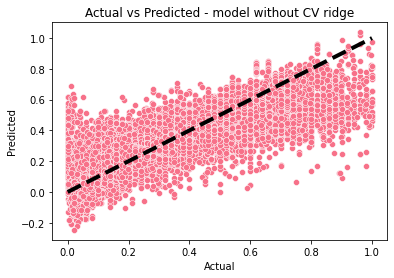

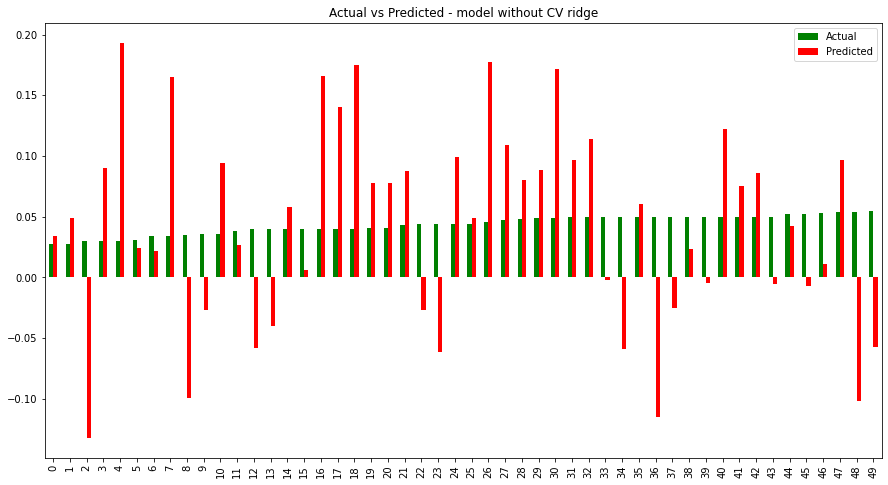

done
Now tuning Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s finished


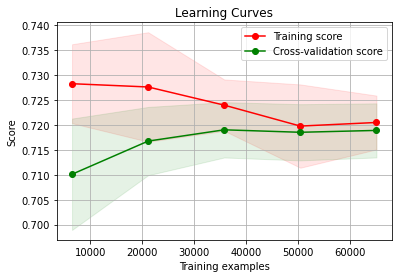

      Actual  Predicted        MAPE
0   0.027981   0.034457   23.144110
1   0.027981   0.049250   76.011159
2   0.029981  -0.132523  542.018696
3   0.029981   0.089902  199.862459
4   0.029981   0.193152  544.243165
5   0.030981   0.023984   22.584447
6   0.033881   0.021912   35.328307
7   0.033981   0.165557  387.200100
8   0.034981  -0.099290  383.837152
9   0.035981  -0.026574  173.854768
10  0.035981   0.094390  162.329821
11  0.037982   0.026894   29.191476
12  0.039982  -0.058072  245.245597
13  0.039982  -0.039823  199.602257
14  0.039982   0.057715   44.354697
15  0.039982   0.005779   85.545294
16  0.039982   0.166240  315.791048
17  0.039982   0.140474  251.347251
18  0.039982   0.175293  338.434858
19  0.040982   0.077395   88.851818
20  0.040982   0.077395   88.851818
21  0.042982   0.087926  104.566395
22  0.043982  -0.026564  160.398568
23  0.043982  -0.061144  239.020468
24  0.043982   0.099001  125.096032
25  0.043982   0.049345   12.195328
26  0.045982   0.177668  286

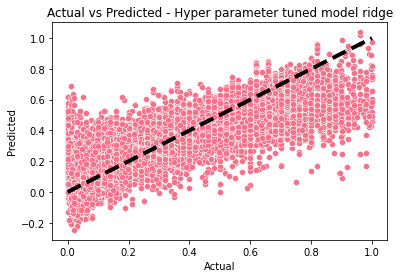

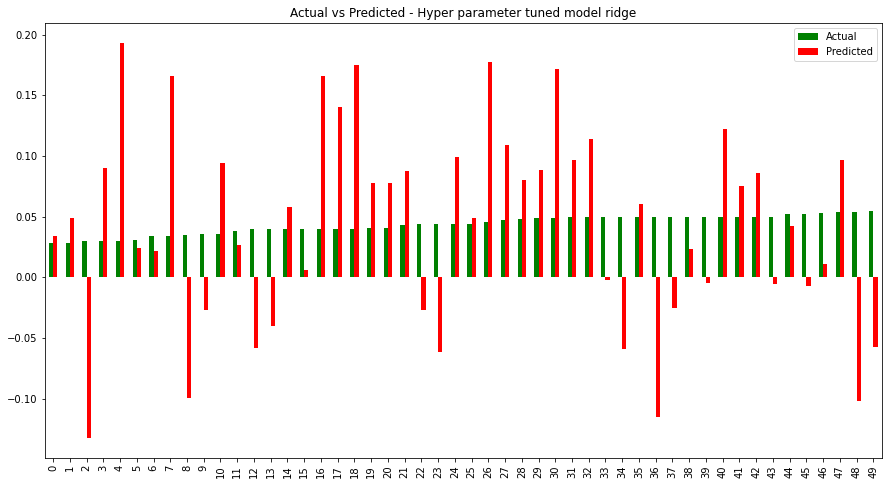

      Actual  Predicted        MAPE
0   0.027981   0.024169   13.625267
1   0.027981   0.044087   57.558127
2   0.029981  -0.156390  621.626647
3   0.029981   0.087664  192.396550
4   0.029981   0.196420  555.143265
5   0.030981   0.000403   98.699182
6   0.033881   0.004344   87.180195
7   0.033981   0.170884  402.876350
8   0.034981  -0.109625  413.380819
9   0.035981  -0.037026  202.902746
10  0.035981   0.102877  185.917370
11  0.037982   0.023601   37.861342
12  0.039982  -0.069370  273.505985
13  0.039982  -0.049980  225.007300
14  0.039982   0.043289    8.271171
15  0.039982  -0.003605  109.015971
16  0.039982   0.168487  321.410897
17  0.039982   0.148347  271.038642
18  0.039982   0.180469  351.379126
19  0.040982   0.076941   87.745988
20  0.040982   0.076941   87.745988
21  0.042982   0.088761  106.509668
22  0.043982  -0.040511  192.109043
23  0.043982  -0.075948  272.680312
24  0.043982   0.091748  108.605691
25  0.043982   0.050013   13.712588
26  0.045982   0.181467  294

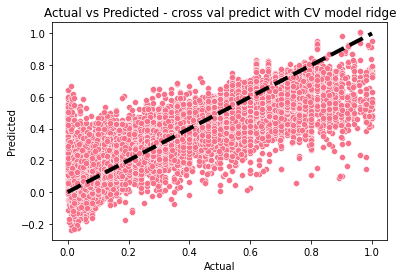

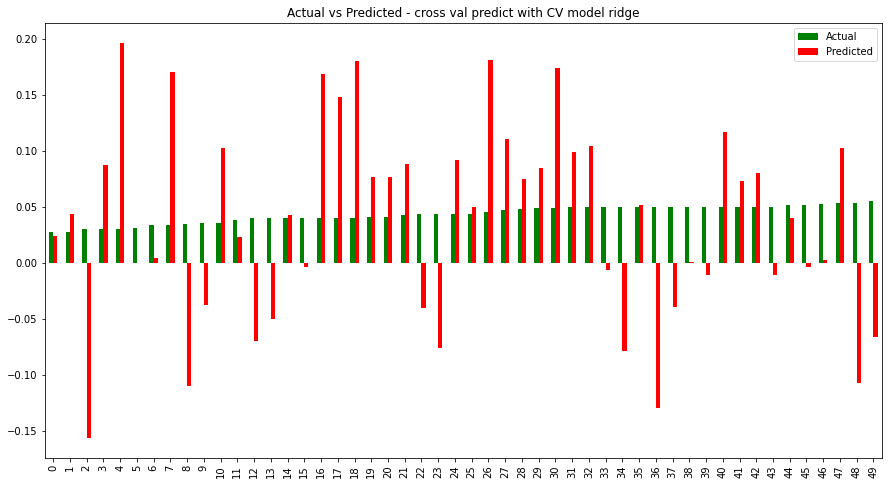

sgd...
       Actual  Predicted        MAPE
0   0.027981   0.229845  721.429696
1   0.027981   0.236066  743.662171
2   0.029981   0.238802  696.504573
3   0.029981   0.260454  768.724972
4   0.029981   0.248110  727.552511
5   0.030981   0.253735  718.997075
6   0.033881   0.257704  660.607744
7   0.033981   0.242659  614.094293
8   0.034981   0.224431  541.571292
9   0.035981   0.237254  559.378542
10  0.035981   0.239769  566.368956
11  0.037982   0.236895  523.711878
12  0.039982   0.225304  463.519579
13  0.039982   0.264393  561.285864
14  0.039982   0.246387  516.251283
15  0.039982   0.231835  479.855303
16  0.039982   0.249679  524.483628
17  0.039982   0.258682  547.002464
18  0.039982   0.259663  549.455406
19  0.040982   0.243379  493.874113
20  0.040982   0.243379  493.874113
21  0.042982   0.242311  463.752910
22  0.043982   0.238004  441.142280
23  0.043982   0.227651  417.603700
24  0.043982   0.247142  461.918270
25  0.043982   0.240977  447.902261
26  0.045982   0.247

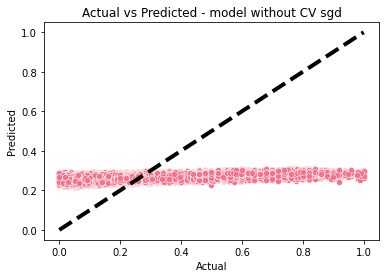

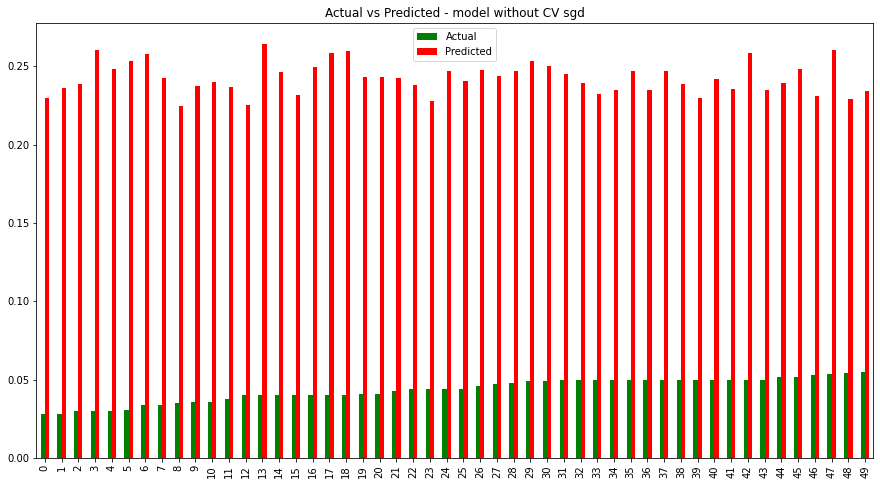

done
Now tuning SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


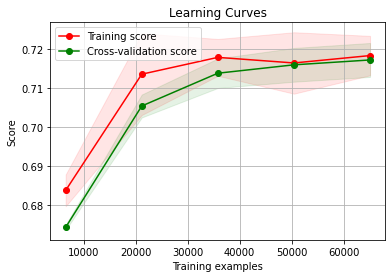

      Actual  Predicted        MAPE
0   0.027981   0.036611   30.841115
1   0.027981   0.049563   77.130884
2   0.029981  -0.128794  529.582485
3   0.029981   0.085509  185.207916
4   0.029981   0.195036  550.527727
5   0.030981   0.029689    4.169482
6   0.033881   0.024345   28.147253
7   0.033981   0.161753  376.006158
8   0.034981  -0.100908  388.463190
9   0.035981  -0.025860  171.870075
10  0.035981   0.094792  163.447627
11  0.037982   0.026471   30.306366
12  0.039982  -0.053820  234.611469
13  0.039982  -0.038887  197.262580
14  0.039982   0.055825   39.627033
15  0.039982   0.004723   88.186163
16  0.039982   0.166913  317.473652
17  0.039982   0.140929  252.485683
18  0.039982   0.173346  333.564385
19  0.040982   0.080577   96.616808
20  0.040982   0.080577   96.616808
21  0.042982   0.087262  103.020274
22  0.043982  -0.023751  154.001966
23  0.043982  -0.060505  237.567997
24  0.043982   0.099565  126.377431
25  0.043982   0.046029    4.654335
26  0.045982   0.175250  281

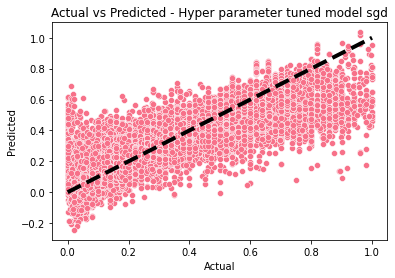

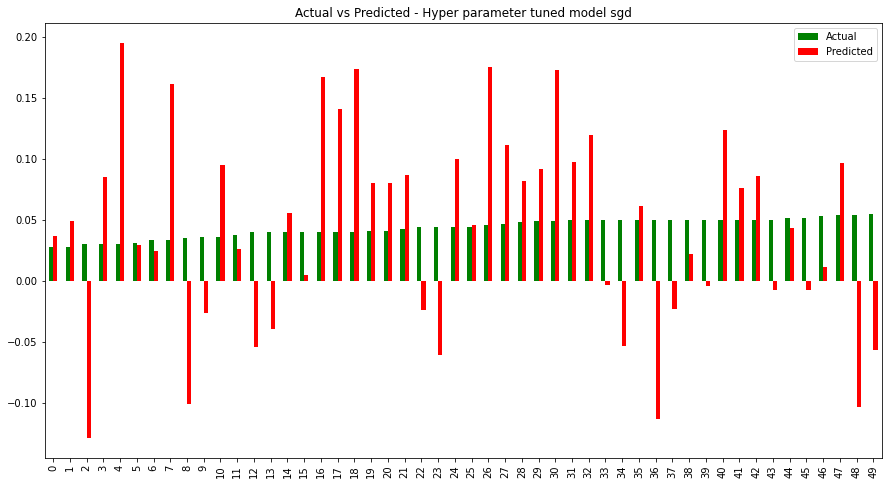

      Actual  Predicted        MAPE
0   0.027981   0.037451   33.845375
1   0.027981   0.042880   53.247261
2   0.029981  -0.095220  417.599427
3   0.029981   0.070471  135.049233
4   0.029981   0.214609  615.812351
5   0.030981   0.073656  137.742716
6   0.033881   0.058263   71.962432
7   0.033981   0.133580  293.097290
8   0.034981  -0.120743  445.162265
9   0.035981  -0.026125  172.605754
10  0.035981   0.119009  230.752399
11  0.037982   0.032602   14.163644
12  0.039982  -0.035732  189.370438
13  0.039982  -0.001544  103.861829
14  0.039982   0.024979   37.523577
15  0.039982  -0.016494  141.254192
16  0.039982   0.169742  324.551221
17  0.039982   0.172890  332.424382
18  0.039982   0.187823  369.773128
19  0.040982   0.110881  170.562190
20  0.040982   0.110881  170.562190
21  0.042982   0.089415  108.029534
22  0.043982  -0.018133  141.229135
23  0.043982  -0.082698  288.026949
24  0.043982   0.085924   95.362551
25  0.043982   0.026825   39.009904
26  0.045982   0.160768  249

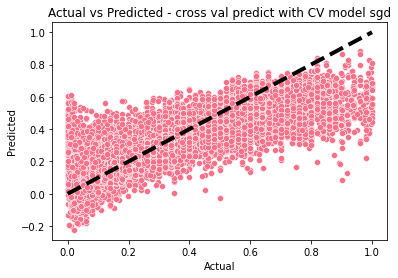

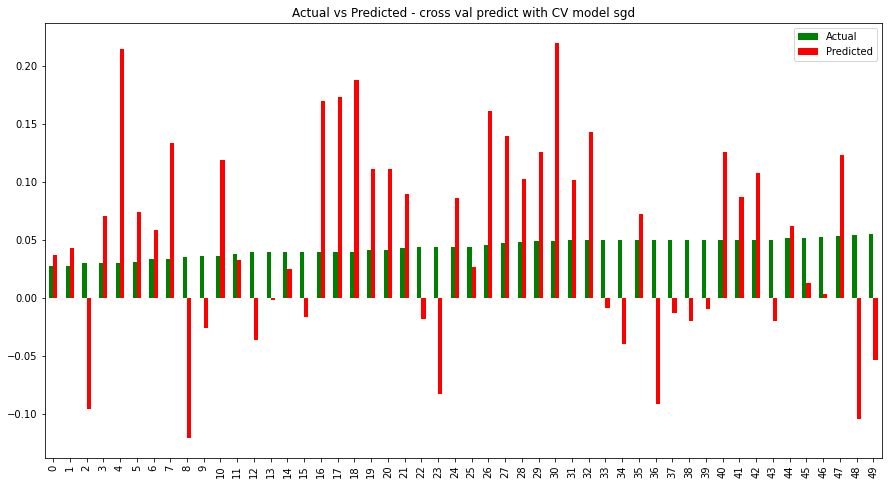

mlp-nn...
       Actual  Predicted        MAPE
0   0.027981   0.059915  114.125816
1   0.027981   0.076973  175.089584
2   0.029981  -0.004523  115.084821
3   0.029981   0.020752   30.781854
4   0.029981   0.104198  247.543746
5   0.030981   0.132551  327.843383
6   0.033881   0.018622   45.037957
7   0.033981   0.132569  290.121537
8   0.034981   0.040280   15.147200
9   0.035981   0.048294   34.219472
10  0.035981   0.098952  175.007301
11  0.037982   0.068047   79.157967
12  0.039982   0.098577  146.555019
13  0.039982   0.032426   18.898799
14  0.039982   0.015979   60.034762
15  0.039982   0.078027   95.158403
16  0.039982   0.117321  193.438227
17  0.039982   0.105845  164.733467
18  0.039982   0.160699  301.932894
19  0.040982   0.088910  116.951064
20  0.040982   0.088910  116.951064
21  0.042982   0.120616  180.621867
22  0.043982   0.035769   18.674064
23  0.043982   0.051015   15.990835
24  0.043982   0.093731  113.113633
25  0.043982   0.099067  125.246310
26  0.045982   0.

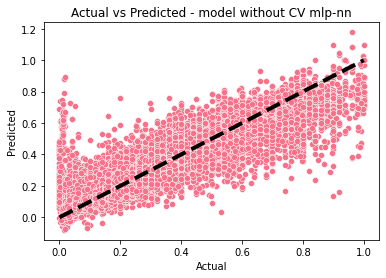

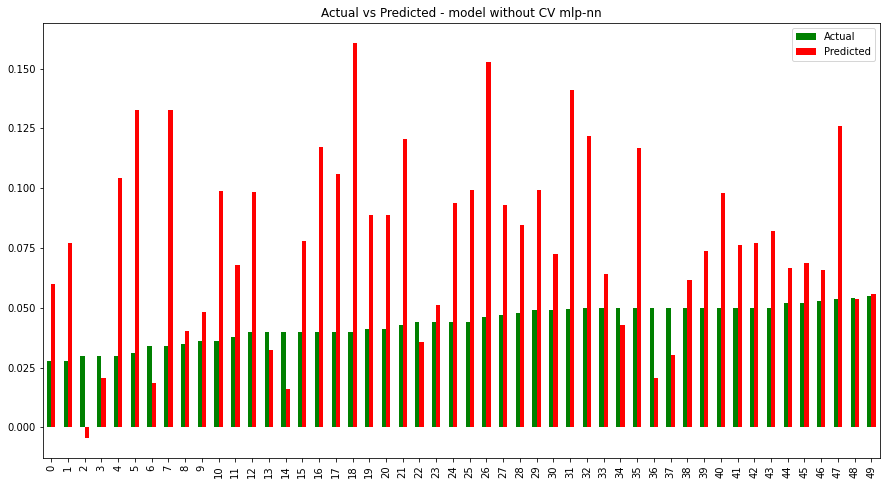

done
Now tuning MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(80, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=30, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.2s finished


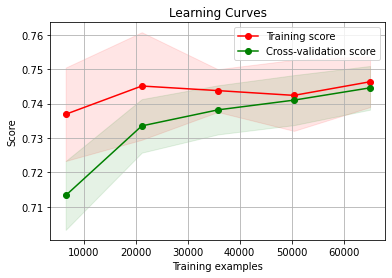

      Actual  Predicted        MAPE
0   0.027981   0.057034  103.832086
1   0.027981   0.069259  147.518896
2   0.029981   0.000822   97.257475
3   0.029981   0.086070  187.078808
4   0.029981   0.176107  487.392215
5   0.030981   0.083935  170.922884
6   0.033881   0.082361  143.085957
7   0.033981   0.132071  288.656207
8   0.034981   0.012074   65.485817
9   0.035981   0.031863   11.447114
10  0.035981   0.104576  190.639366
11  0.037982   0.060309   58.785773
12  0.039982   0.026524   33.658873
13  0.039982   0.052477   31.253279
14  0.039982   0.085201  113.099748
15  0.039982   0.046653   16.686738
16  0.039982   0.141859  254.811389
17  0.039982   0.136365  241.069439
18  0.039982   0.158809  297.204287
19  0.040982   0.097323  137.479161
20  0.040982   0.097323  137.479161
21  0.042982   0.093963  118.610593
22  0.043982   0.032425   26.275218
23  0.043982   0.020040   54.436209
24  0.043982   0.084363   91.812672
25  0.043982   0.067194   52.777090
26  0.045982   0.148578  223

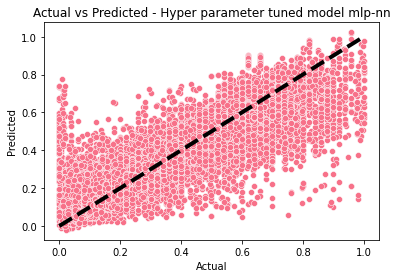

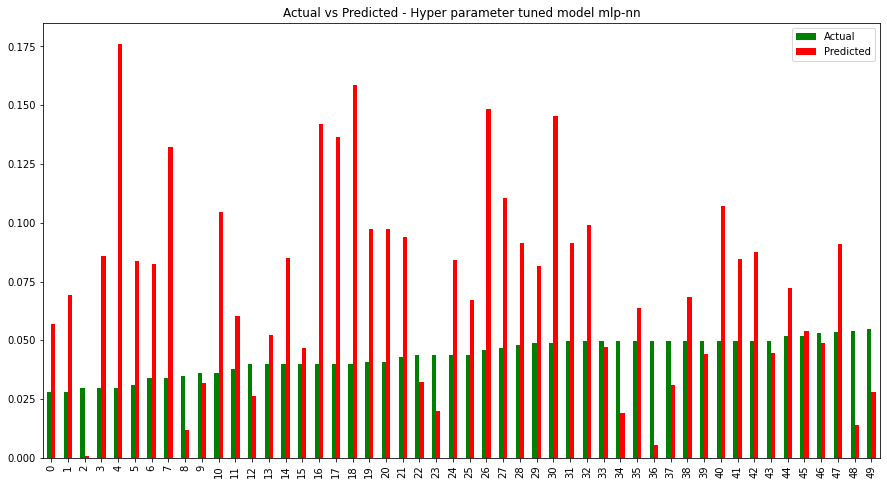

      Actual  Predicted        MAPE
0   0.027981   0.030631    9.468609
1   0.027981   0.045804   63.694616
2   0.029981  -0.067901  326.479891
3   0.029981   0.069552  131.984163
4   0.029981   0.191944  540.215740
5   0.030981   0.016773   45.859723
6   0.033881   0.021730   35.865772
7   0.033981   0.133015  291.434879
8   0.034981  -0.040535  215.875765
9   0.035981  -0.009898  127.508078
10  0.035981   0.089368  148.372372
11  0.037982   0.036569    3.718007
12  0.039982  -0.020246  150.638210
13  0.039982  -0.004616  111.544405
14  0.039982   0.036033    9.876476
15  0.039982   0.009989   75.016648
16  0.039982   0.142080  255.363318
17  0.039982   0.136796  242.146592
18  0.039982   0.156912  292.460986
19  0.040982   0.082953  102.414889
20  0.040982   0.082953  102.414889
21  0.042982   0.076661   78.357487
22  0.043982  -0.011130  125.305109
23  0.043982  -0.033772  176.785386
24  0.043982   0.061443   39.700171
25  0.043982   0.040580    7.735373
26  0.045982   0.147237  220

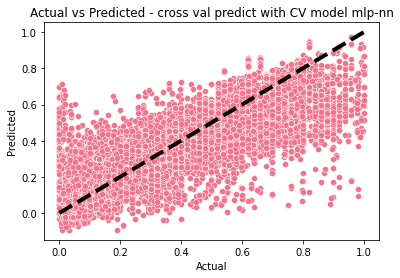

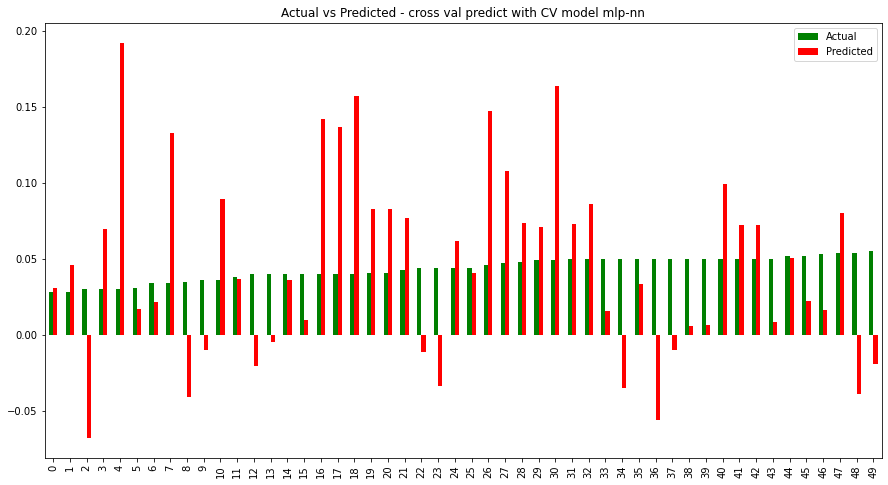

gbm...
       Actual  Predicted        MAPE
0   0.027981   0.052136   86.324436
1   0.027981   0.053551   91.381687
2   0.029981   0.012090   59.675542
3   0.029981   0.076687  155.783961
4   0.029981   0.117207  290.933941
5   0.030981   0.087515  182.476952
6   0.033881   0.011579   65.823530
7   0.033981   0.111570  228.327558
8   0.034981   0.005009   85.682240
9   0.035981   0.042648   18.527560
10  0.035981   0.083467  131.972148
11  0.037982   0.051346   35.186405
12  0.039982   0.063414   58.608575
13  0.039982   0.018735   53.141051
14  0.039982   0.047061   17.706072
15  0.039982   0.059100   47.816937
16  0.039982   0.110152  175.507614
17  0.039982   0.104757  162.012784
18  0.039982   0.145157  263.060165
19  0.040982   0.076384   86.385515
20  0.040982   0.076384   86.385515
21  0.042982   0.087089  102.617660
22  0.043982   0.051873   17.941233
23  0.043982   0.050454   14.715754
24  0.043982   0.100135  127.673748
25  0.043982   0.105257  139.319807
26  0.045982   0.140

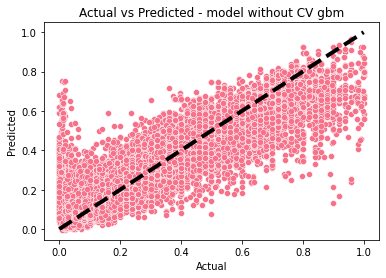

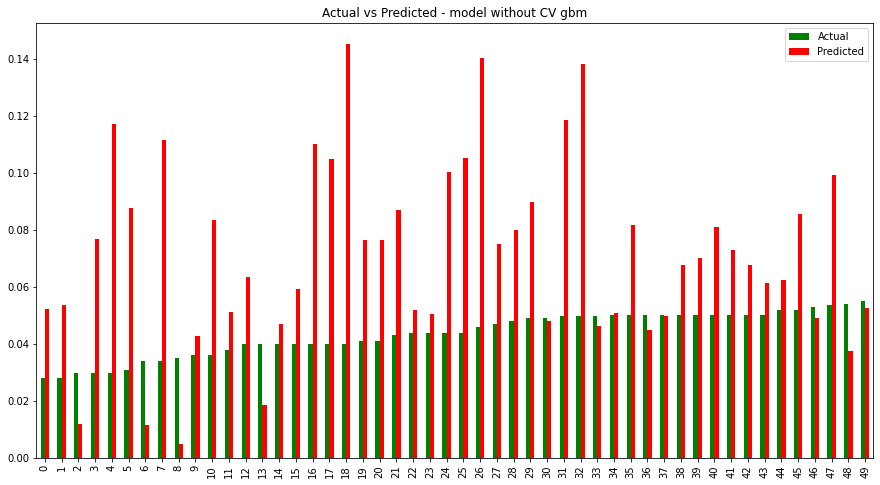

done
Now tuning GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=30, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.0s finished


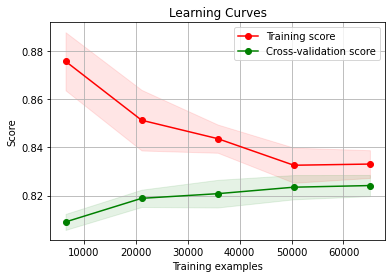

      Actual  Predicted        MAPE
0   0.027981   0.033273   18.911274
1   0.027981   0.072785  160.121880
2   0.029981   0.008361   72.112947
3   0.029981   0.040847   36.240984
4   0.029981   0.111305  271.250390
5   0.030981   0.100994  225.985241
6   0.033881  -0.000328  100.968244
7   0.033981   0.107708  216.962607
8   0.034981  -0.002638  107.540998
9   0.035981   0.057720   60.417225
10  0.035981   0.067426   87.389768
11  0.037982   0.041089    8.181985
12  0.039982   0.042820    7.100196
13  0.039982  -0.003577  108.946971
14  0.039982   0.048513   21.337488
15  0.039982   0.058967   47.484342
16  0.039982   0.110132  175.457870
17  0.039982   0.104896  162.359814
18  0.039982   0.155117  287.971271
19  0.040982   0.076016   85.486934
20  0.040982   0.076016   85.486934
21  0.042982   0.091584  113.076559
22  0.043982   0.063589   44.579507
23  0.043982   0.050334   14.441809
24  0.043982   0.098340  123.592777
25  0.043982   0.083015   88.749540
26  0.045982   0.141197  207

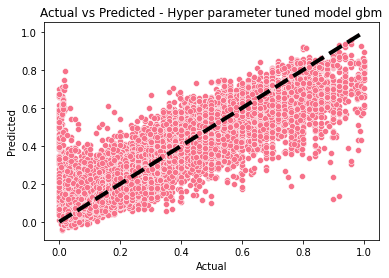

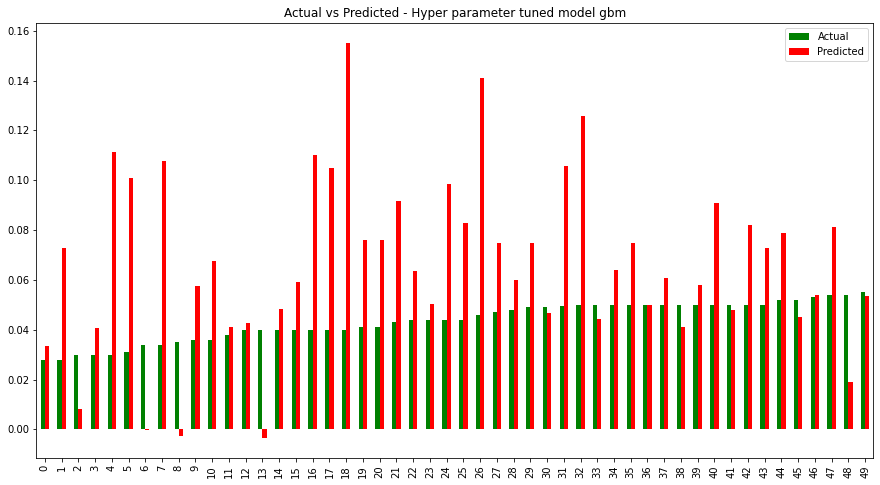

      Actual  Predicted        MAPE
0   0.027981   0.052538   87.762405
1   0.027981   0.079218  183.112733
2   0.029981   0.032874    9.649894
3   0.029981   0.068171  127.379418
4   0.029981   0.107775  259.476556
5   0.030981   0.100869  225.579786
6   0.033881  -0.014240  142.029375
7   0.033981   0.124261  265.674670
8   0.034981   0.007076   79.771968
9   0.035981   0.056647   57.433788
10  0.035981   0.076369  112.244319
11  0.037982   0.048384   27.386987
12  0.039982   0.077610   94.115013
13  0.039982  -0.019912  149.803336
14  0.039982   0.030317   24.173643
15  0.039982   0.077762   94.494335
16  0.039982   0.110614  176.663313
17  0.039982   0.110393  176.110012
18  0.039982   0.151650  279.298581
19  0.040982   0.075935   85.289952
20  0.040982   0.075935   85.289952
21  0.042982   0.084710   97.084113
22  0.043982   0.070277   59.786203
23  0.043982   0.058346   32.660143
24  0.043982   0.103368  135.025242
25  0.043982   0.091500  108.040833
26  0.045982   0.140354  205

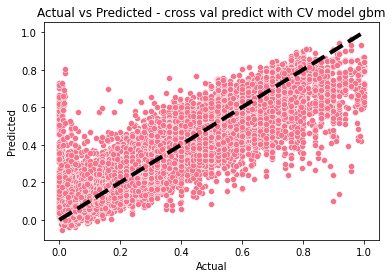

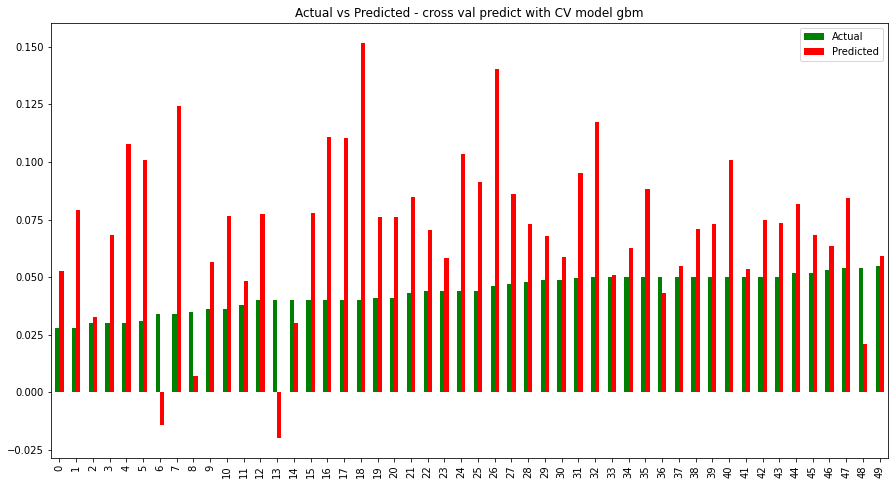

      Actual  Predicted        MAPE
0   0.027981   0.047733   70.590497
1   0.027981   0.070359  151.451142
2   0.029981   0.031240    4.199912
3   0.029981   0.085369  184.741958
4   0.029981   0.113672  279.145562
5   0.030981   0.104486  237.254125
6   0.033881   0.010640   68.596773
7   0.033981   0.108716  219.929729
8   0.034981   0.002065   94.096233
9   0.035981   0.051793   43.942608
10  0.035981   0.073717  104.873791
11  0.037982   0.038874    2.350510
12  0.039982   0.065442   63.681367
13  0.039982  -0.005943  114.864386
14  0.039982   0.035956   10.069077
15  0.039982   0.065025   62.636715
16  0.039982   0.082261  105.746030
17  0.039982   0.098430  146.188368
18  0.039982   0.150968  277.592787
19  0.040982   0.078070   90.499249
20  0.040982   0.078070   90.499249
21  0.042982   0.084877   97.471920
22  0.043982   0.060901   38.467960
23  0.043982   0.039946    9.176660
24  0.043982   0.115667  162.988038
25  0.043982   0.092646  110.645854
26  0.045982   0.138199  200

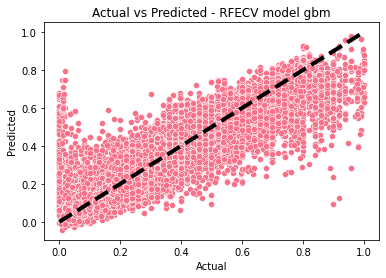

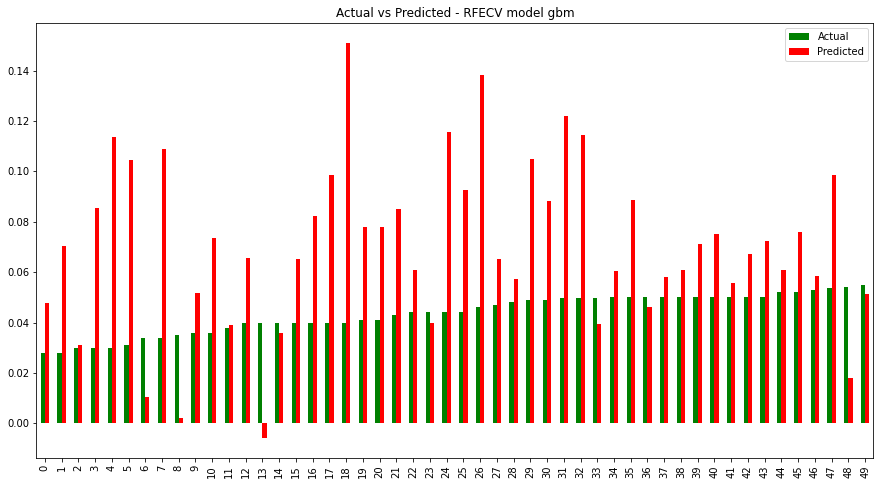

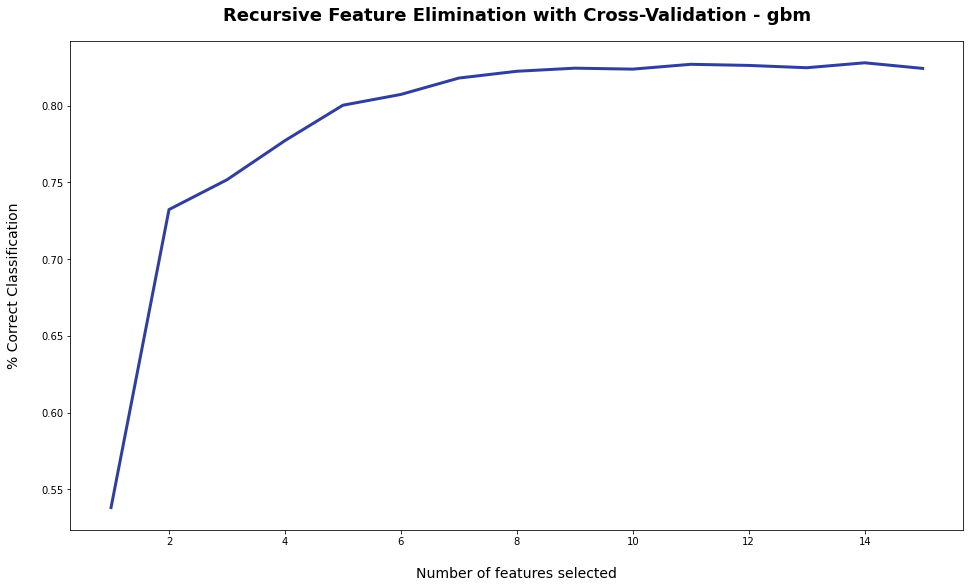

Optimal number of features: 14
xgb...
       Actual  Predicted        MAPE
0   0.027981   0.048078   71.822155
1   0.027981   0.053753   92.104391
2   0.029981   0.019840   33.824791
3   0.029981   0.075714  152.537840
4   0.029981   0.101107  237.234382
5   0.030981   0.084519  172.807800
6   0.033881   0.019674   41.932832
7   0.033981   0.103116  203.450053
8   0.034981  -0.000619  101.769666
9   0.035981   0.040612   12.868178
10  0.035981   0.082492  129.261305
11  0.037982   0.046705   22.966777
12  0.039982   0.059676   49.258864
13  0.039982   0.015333   61.649941
14  0.039982   0.036766    8.043909
15  0.039982   0.056206   40.578745
16  0.039982   0.106588  166.593771
17  0.039982   0.105290  163.346282
18  0.039982   0.142880  257.364898
19  0.040982   0.071058   73.389710
20  0.040982   0.071058   73.389710
21  0.042982   0.084153   95.788018
22  0.043982   0.052545   19.469533
23  0.043982   0.042337    3.740384
24  0.043982   0.098603  124.190624
25  0.043982   0.103248  

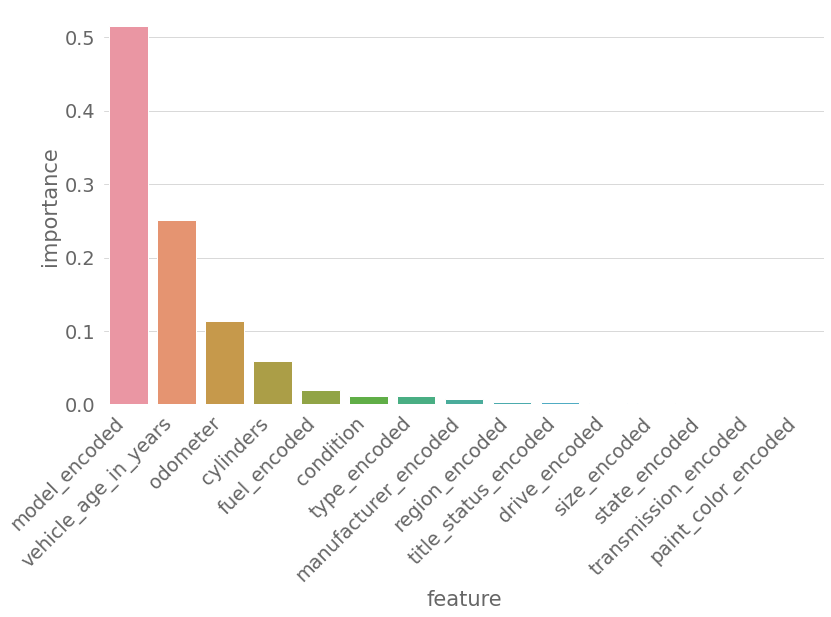

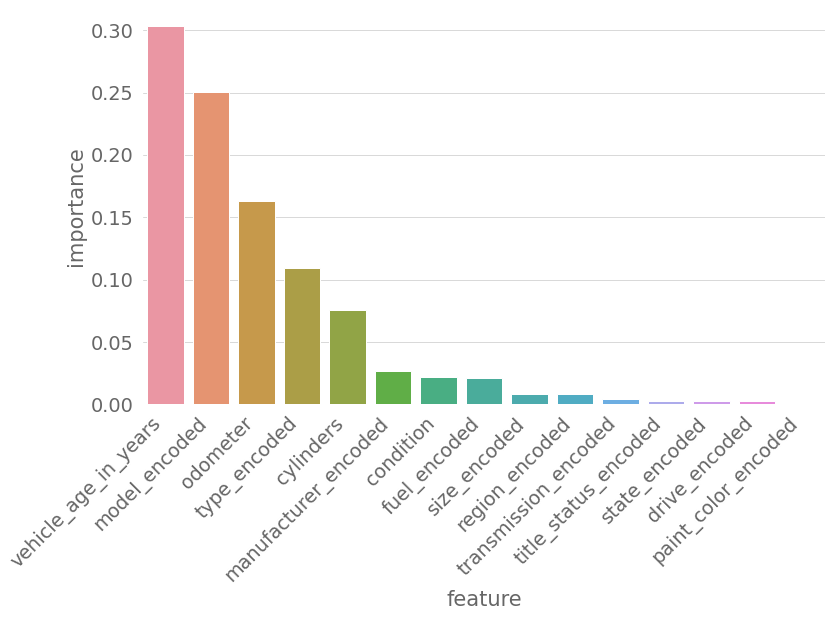

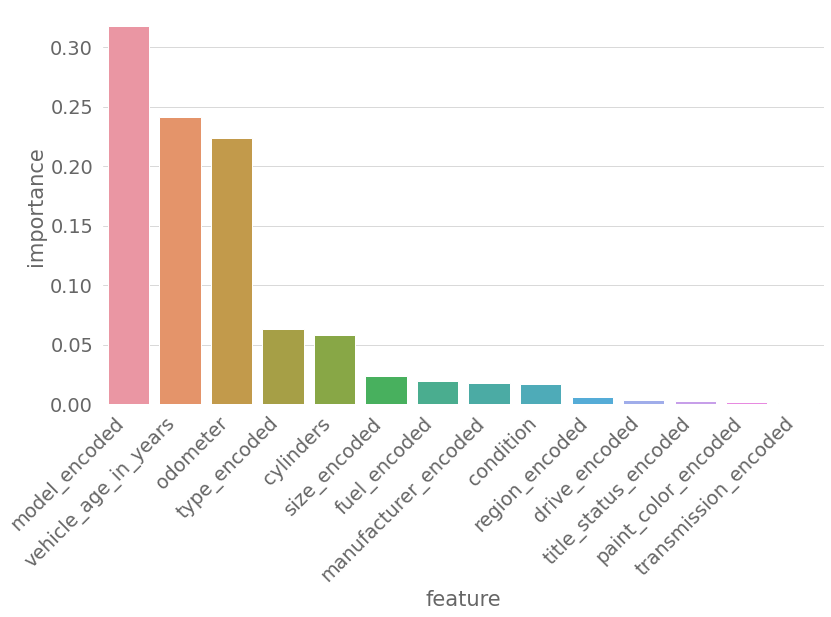

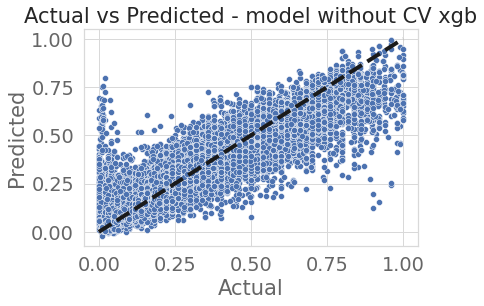

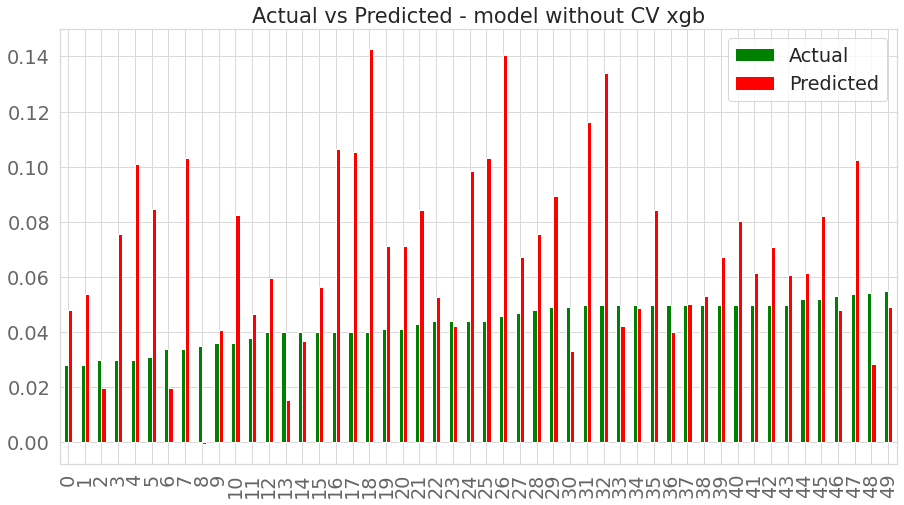

done
Now tuning XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.9s finished


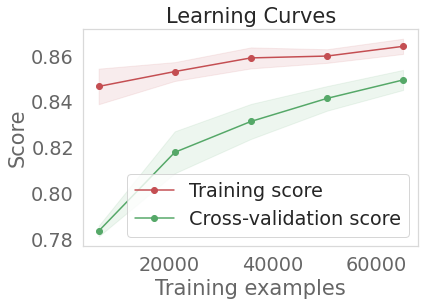

      Actual  Predicted        MAPE
0   0.027981   0.060207  115.170551
1   0.027981   0.066264  136.816631
2   0.029981   0.052131   73.877766
3   0.029981   0.052675   75.694363
4   0.029981   0.080990  170.134920
5   0.030981   0.097627  215.116171
6   0.033881  -0.006054  117.867660
7   0.033981   0.094022  176.686042
8   0.034981  -0.003248  109.285037
9   0.035981   0.047872   33.045150
10  0.035981   0.035188    2.204584
11  0.037982   0.044273   16.564634
12  0.039982   0.064866   62.238904
13  0.039982   0.022542   43.618542
14  0.039982   0.046792   17.034957
15  0.039982   0.070646   76.695583
16  0.039982   0.072806   82.099143
17  0.039982   0.114769  187.054878
18  0.039982   0.150830  277.248394
19  0.040982   0.055784   36.118372
20  0.040982   0.055784   36.118372
21  0.042982   0.095159  121.393068
22  0.043982   0.050186   14.106414
23  0.043982   0.051844   17.875938
24  0.043982   0.092872  111.159439
25  0.043982   0.087831   99.697726
26  0.045982   0.124975  171

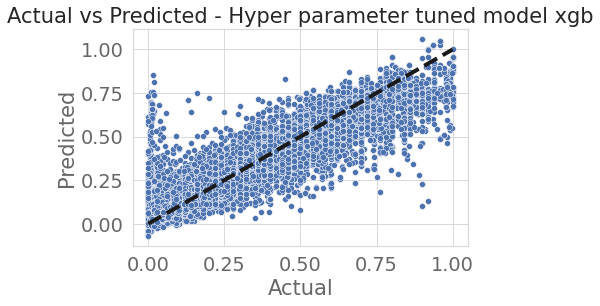

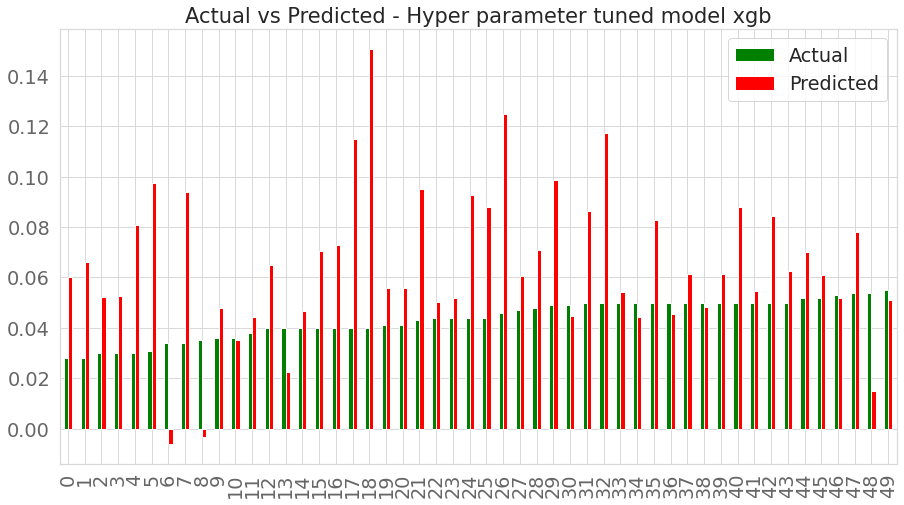

      Actual  Predicted        MAPE
0   0.027981   0.057890  106.888436
1   0.027981   0.050050   78.870900
2   0.029981   0.009451   68.476110
3   0.029981   0.056659   88.981711
4   0.029981   0.154788  416.282714
5   0.030981   0.048597   56.860337
6   0.033881  -0.004420  113.044416
7   0.033981   0.132413  289.663636
8   0.034981   0.000828   97.633375
9   0.035981   0.043447   20.748581
10  0.035981   0.090703  152.082941
11  0.037982   0.054216   42.743334
12  0.039982   0.044700   11.801721
13  0.039982   0.000839   97.902367
14  0.039982   0.041491    3.776063
15  0.039982   0.060744   51.928816
16  0.039982   0.131844  229.761359
17  0.039982   0.106648  166.743820
18  0.039982   0.158925  297.495273
19  0.040982   0.055199   34.691001
20  0.040982   0.055199   34.691001
21  0.042982   0.090523  110.608498
22  0.043982   0.045742    4.001201
23  0.043982   0.051564   17.240547
24  0.043982   0.083364   89.542913
25  0.043982   0.077390   75.958666
26  0.045982   0.151670  229

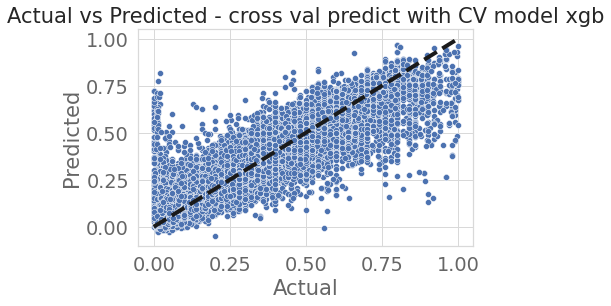

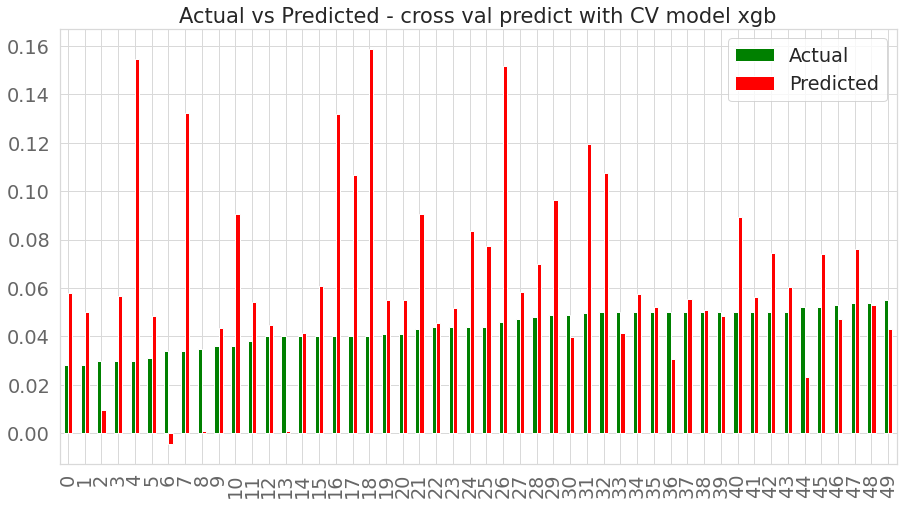

      Actual  Predicted        MAPE
0   0.027981   0.044735   59.875502
1   0.027981   0.057835  106.693844
2   0.029981   0.035067   16.964367
3   0.029981   0.056445   88.269187
4   0.029981   0.106595  255.539313
5   0.030981   0.076034  145.419619
6   0.033881   0.023361   31.051461
7   0.033981   0.085680  152.139049
8   0.034981   0.014696   57.989096
9   0.035981   0.049686   38.088565
10  0.035981   0.047445   31.860891
11  0.037982   0.053936   42.006231
12  0.039982   0.047943   19.912503
13  0.039982   0.020057   49.833770
14  0.039982   0.024478   38.776865
15  0.039982   0.072354   80.967252
16  0.039982   0.071041   77.685251
17  0.039982   0.106147  165.490875
18  0.039982   0.150394  276.158990
19  0.040982   0.051880   26.592264
20  0.040982   0.051880   26.592264
21  0.042982   0.086564  101.397328
22  0.043982   0.046833    6.483409
23  0.043982   0.051783   17.737436
24  0.043982   0.097253  121.121067
25  0.043982   0.071587   62.765941
26  0.045982   0.104469  127

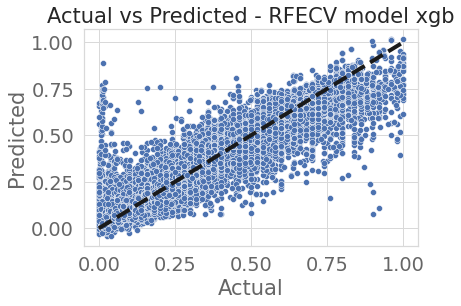

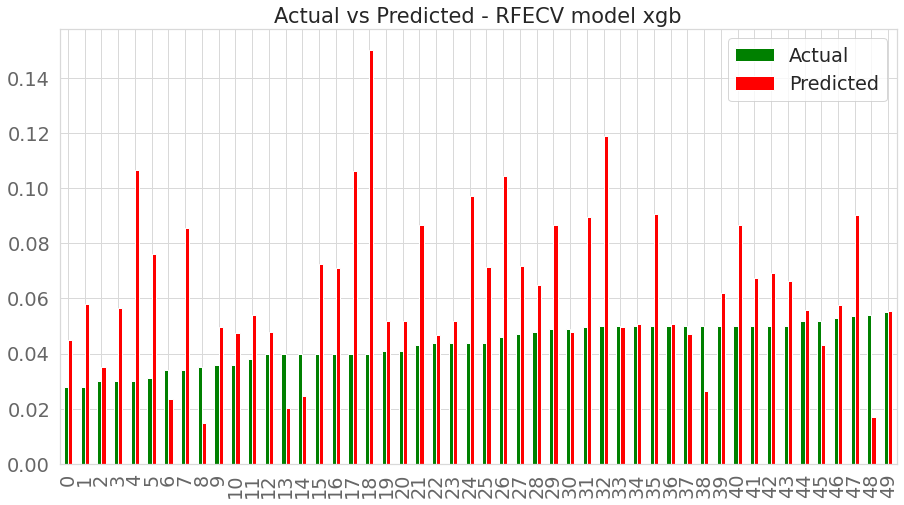

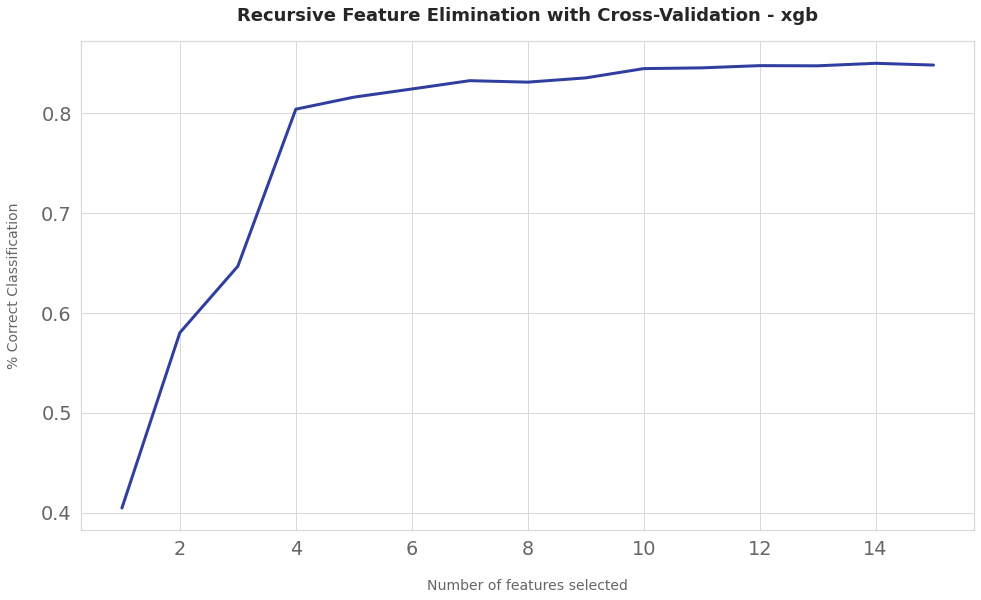

Optimal number of features: 14
bagging...
       Actual  Predicted        MAPE
0   0.027981   0.038936   39.149392
1   0.027981   0.051482   83.988563
2   0.029981   0.025481   15.010007
3   0.029981   0.074558  148.682455
4   0.029981   0.060572  102.034690
5   0.030981   0.082881  167.520981
6   0.033881   0.023481   30.696576
7   0.033981   0.061762   81.753973
8   0.034981   0.039882   14.008005
9   0.035981   0.040575   12.766352
10  0.035981   0.083540  132.174819
11  0.037982   0.068163   79.462875
12  0.039982   0.061450   53.696848
13  0.039982   0.033371   16.533267
14  0.039982   0.031331   21.635818
15  0.039982   0.049572   23.986993
16  0.039982   0.128175  220.585293
17  0.039982   0.138149  245.532481
18  0.039982   0.178959  347.603802
19  0.040982   0.055782   36.115178
20  0.040982   0.055782   36.115178
21  0.042982   0.079590   85.172173
22  0.043982   0.035673   18.890405
23  0.043982   0.048172    9.527058
24  0.043982   0.097064  120.691223
25  0.043982   0.0815

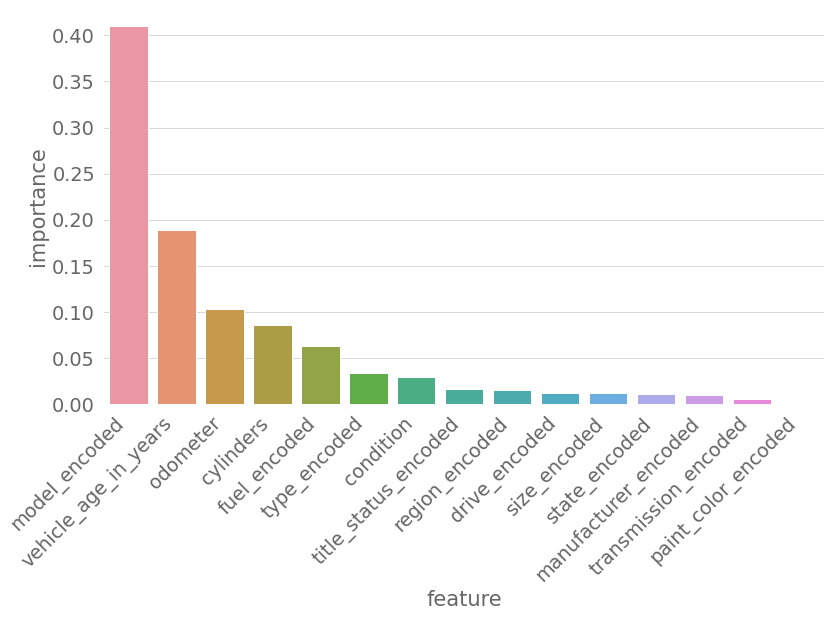

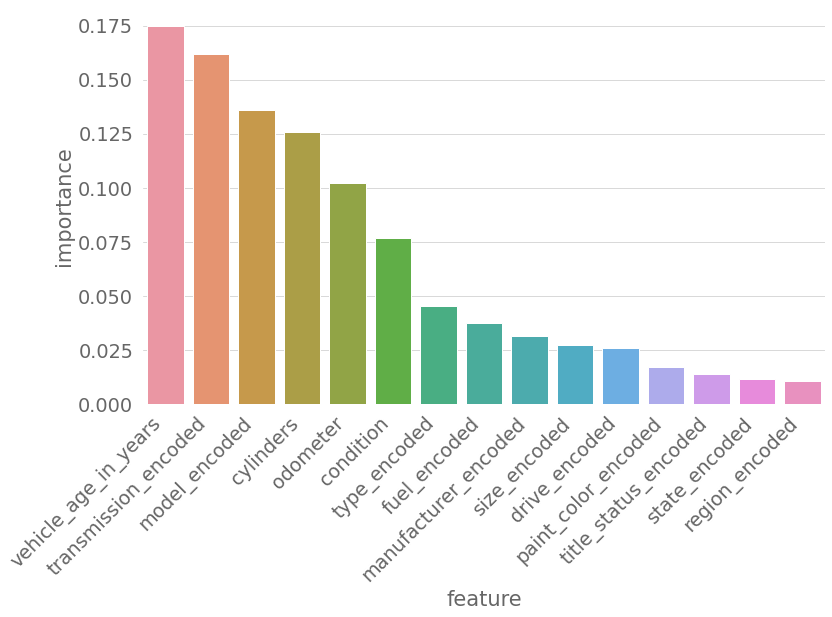

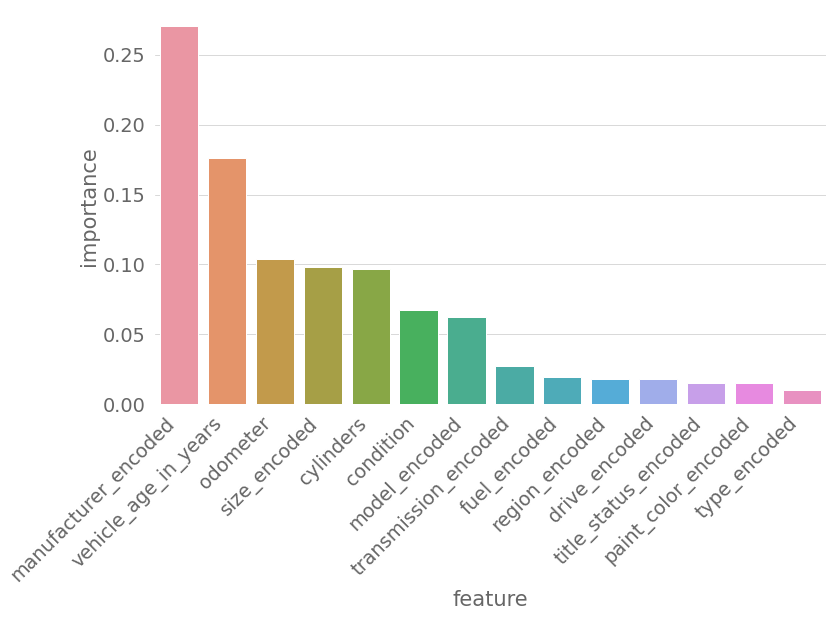

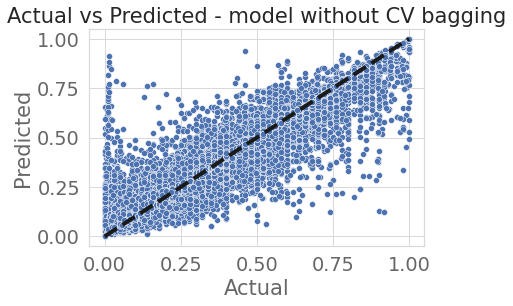

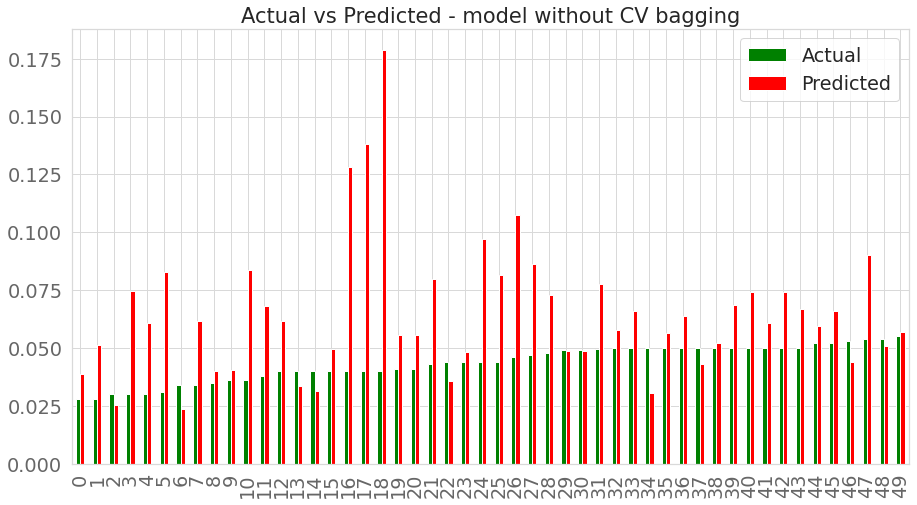

done
Now tuning BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min finished


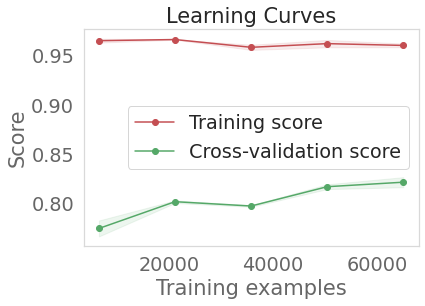

      Actual  Predicted        MAPE
0   0.027981   0.071246  154.622166
1   0.027981   0.085457  205.411093
2   0.029981   0.079537  165.288310
3   0.029981   0.139407  364.982699
4   0.029981   0.141204  370.976689
5   0.030981   0.113189  265.348109
6   0.033881   0.088603  161.510539
7   0.033981   0.090490  166.291897
8   0.034981   0.050250   43.648600
9   0.035981   0.066970   86.123796
10  0.035981   0.115628  221.355844
11  0.037982   0.078116  105.668802
12  0.039982   0.087190  118.075586
13  0.039982   0.090072  125.282610
14  0.039982   0.092826  132.171070
15  0.039982   0.075928   89.907315
16  0.039982   0.112437  181.222413
17  0.039982   0.136650  241.783444
18  0.039982   0.175596  339.192404
19  0.040982   0.085445  108.496097
20  0.040982   0.085445  108.496097
21  0.042982   0.110484  157.049766
22  0.043982   0.080863   83.856068
23  0.043982   0.072437   64.698078
24  0.043982   0.106416  141.954734
25  0.043982   0.108960  147.740067
26  0.045982   0.119979  160

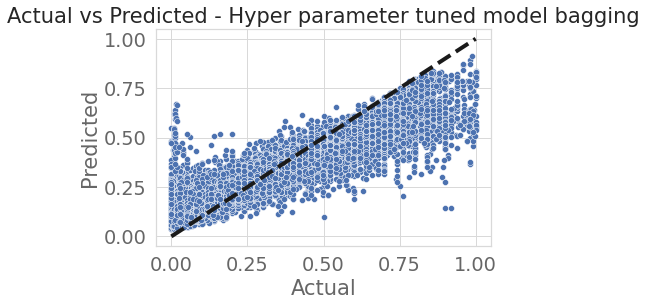

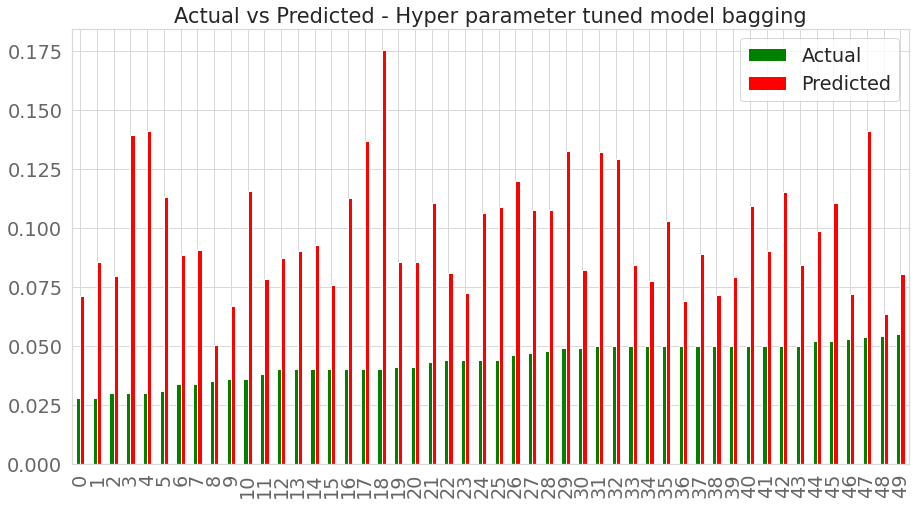

      Actual  Predicted        MAPE
0   0.027981   0.084158  200.768477
1   0.027981   0.115400  312.419877
2   0.029981   0.079860  166.368245
3   0.029981   0.141655  372.478380
4   0.029981   0.141473  371.871285
5   0.030981   0.125374  304.678119
6   0.033881   0.097860  188.832780
7   0.033981   0.118086  247.501498
8   0.034981   0.053628   53.304639
9   0.035981   0.068591   90.630112
10  0.035981   0.117599  226.831158
11  0.037982   0.106968  181.631734
12  0.039982   0.081286  103.309435
13  0.039982   0.079214   98.125471
14  0.039982   0.086721  116.902503
15  0.039982   0.093019  132.654435
16  0.039982   0.152768  282.095645
17  0.039982   0.154197  285.668912
18  0.039982   0.197959  395.125703
19  0.040982   0.105076  156.397735
20  0.040982   0.105076  156.397735
21  0.042982   0.148415  245.296900
22  0.043982   0.081317   84.888519
23  0.043982   0.098042  122.915347
24  0.043982   0.130321  196.307753
25  0.043982   0.123312  180.369806
26  0.045982   0.124775  171

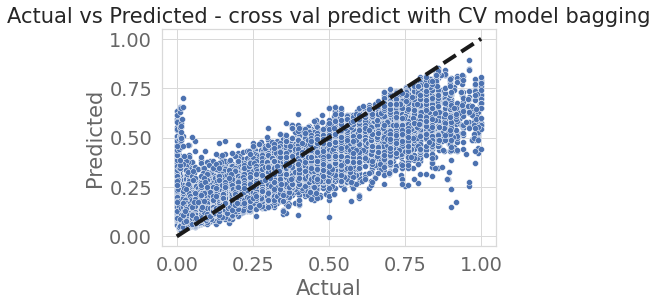

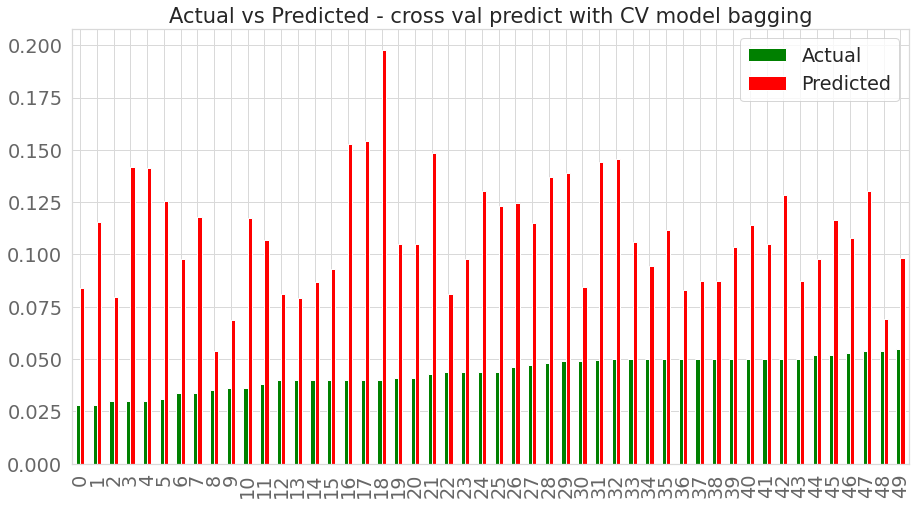

ada boost...
       Actual  Predicted        MAPE
0   0.027981   0.129597  363.159956
1   0.027981   0.112777  303.045274
2   0.029981   0.111698  272.560494
3   0.029981   0.248283  728.129848
4   0.029981   0.248283  728.129848
5   0.030981   0.111698  260.534655
6   0.033881   0.111698  229.674250
7   0.033981   0.235461  592.911557
8   0.034981   0.111698  219.307135
9   0.035981   0.111698  210.432562
10  0.035981   0.111698  210.432562
11  0.037982   0.111698  194.085403
12  0.039982   0.111698  179.373777
13  0.039982   0.111698  179.373777
14  0.039982   0.188087  370.434380
15  0.039982   0.111698  179.373777
16  0.039982   0.221808  454.776454
17  0.039982   0.217383  443.707662
18  0.039982   0.200385  401.192960
19  0.040982   0.200385  388.962775
20  0.040982   0.200385  388.962775
21  0.042982   0.112777  162.382661
22  0.043982   0.111698  153.964611
23  0.043982   0.111698  153.964611
24  0.043982   0.248931  465.987064
25  0.043982   0.188087  327.648170
26  0.045982  

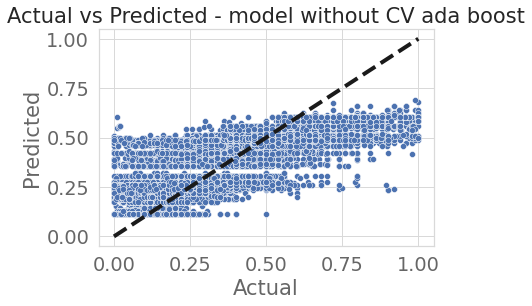

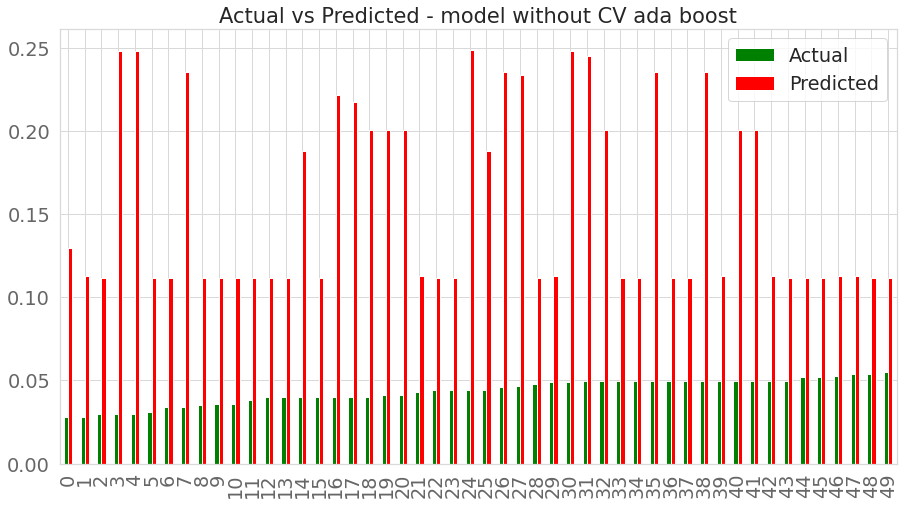

done
Now tuning AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   24.6s finished


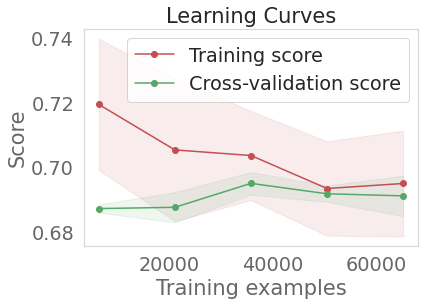

      Actual  Predicted        MAPE
0   0.027981   0.108109  286.363377
1   0.027981   0.108109  286.363377
2   0.029981   0.108109  260.588635
3   0.029981   0.238653  696.007430
4   0.029981   0.222447  641.955290
5   0.030981   0.108109  248.949234
6   0.033881   0.108109  219.080498
7   0.033981   0.224482  560.602574
8   0.034981   0.108109  209.046520
9   0.035981   0.108109  200.457123
10  0.035981   0.108109  200.457123
11  0.037982   0.108109  184.635263
12  0.039982   0.108109  170.396380
13  0.039982   0.108109  170.396380
14  0.039982   0.155150  288.054231
15  0.039982   0.108270  170.800748
16  0.039982   0.179589  349.179855
17  0.039982   0.114227  185.698307
18  0.039982   0.185100  362.962059
19  0.040982   0.114227  178.726655
20  0.040982   0.114227  178.726655
21  0.042982   0.108109  151.522738
22  0.043982   0.108109  145.803713
23  0.043982   0.108270  146.171303
24  0.043982   0.234399  432.946525
25  0.043982   0.110926  152.209084
26  0.045982   0.224482  388

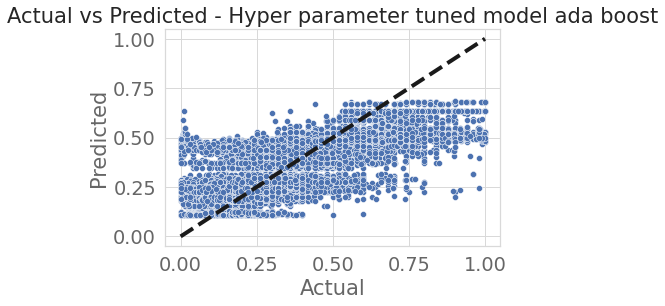

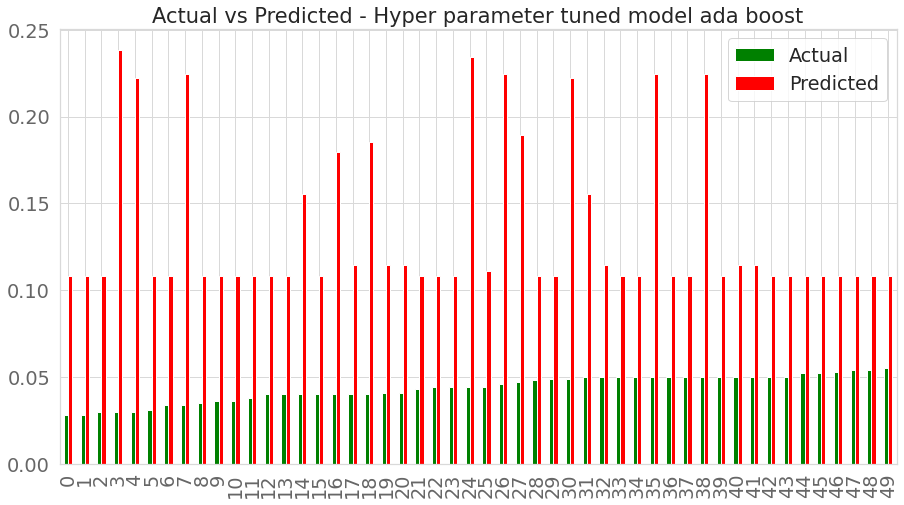

      Actual  Predicted        MAPE
0   0.027981   0.112310  301.378370
1   0.027981   0.112310  301.378370
2   0.029981   0.112310  274.601961
3   0.029981   0.221659  639.327388
4   0.029981   0.194957  550.263764
5   0.030981   0.112310  262.510225
6   0.033881   0.112310  231.480720
7   0.033981   0.206875  508.790246
8   0.034981   0.112310  221.056798
9   0.035981   0.112310  212.133596
10  0.035981   0.112310  212.133596
11  0.037982   0.112310  195.696861
12  0.039982   0.112310  180.904622
13  0.039982   0.112310  180.904622
14  0.039982   0.175711  339.479777
15  0.039982   0.112310  180.904622
16  0.039982   0.131163  228.057467
17  0.039982   0.112310  180.904622
18  0.039982   0.168300  320.943022
19  0.040982   0.112310  174.049946
20  0.040982   0.112310  174.049946
21  0.042982   0.112310  161.297505
22  0.043982   0.112310  155.356225
23  0.043982   0.112310  155.356225
24  0.043982   0.216097  391.332669
25  0.043982   0.168300  282.658072
26  0.045982   0.213071  363

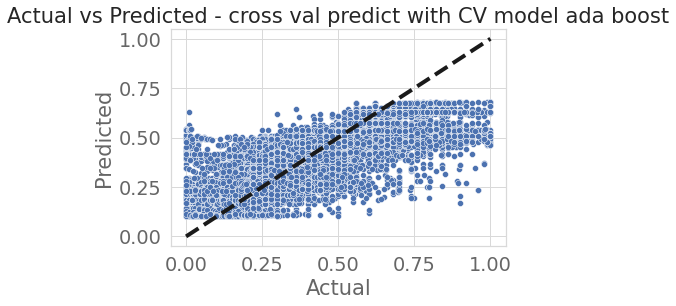

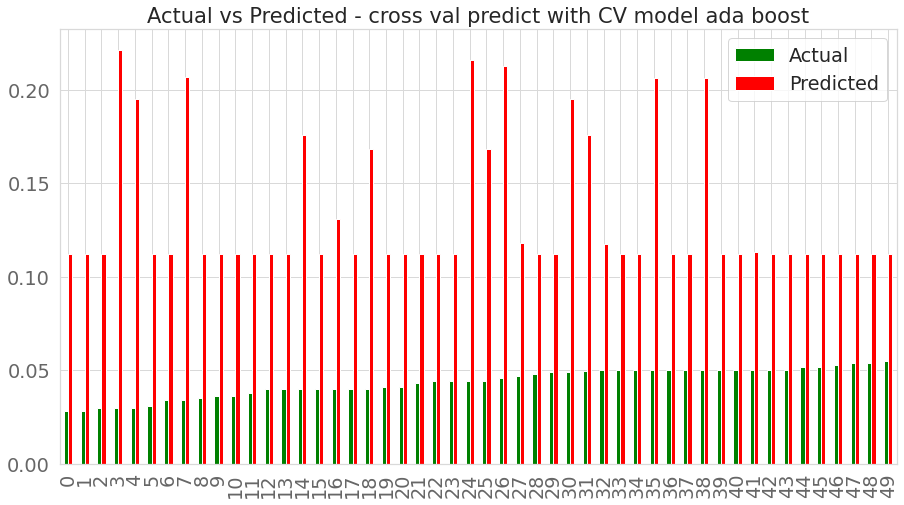

DTC...
       Actual  Predicted        MAPE
0   0.027981   0.029981    7.147963
1   0.027981   0.048982   75.053610
2   0.029981   0.013981   53.368913
3   0.029981   0.089984  200.133422
4   0.029981   0.065983  120.080053
5   0.030981   0.055982   80.697224
6   0.033881   0.029981   11.511216
7   0.033981   0.137986  306.062390
8   0.034981   0.025981   25.728988
9   0.035981   0.039982   11.117287
10  0.035981   0.088984  147.304058
11  0.037982   0.065983   73.723012
12  0.039982   0.077943   94.947474
13  0.039982   0.041982    5.002501
14  0.039982   0.029981   25.012506
15  0.039982   0.065983   65.032516
16  0.039982   0.049982   25.012506
17  0.039982   0.139886  249.874937
18  0.039982   0.139986  250.125063
19  0.040982   0.031981   21.961933
20  0.040982   0.031981   21.961933
21  0.042982   0.063983   48.859935
22  0.043982   0.049982   13.642565
23  0.043982   0.029981   31.832651
24  0.043982   0.079883   81.628013
25  0.043982   0.083983   90.950432
26  0.045982   0.139

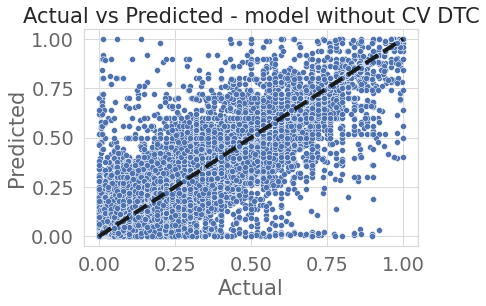

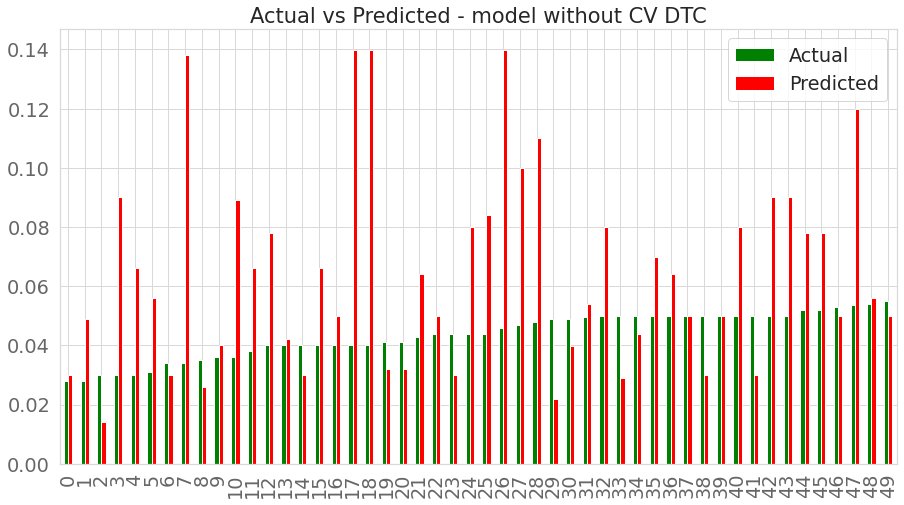

done
Now tuning DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best').
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   24.7s finished


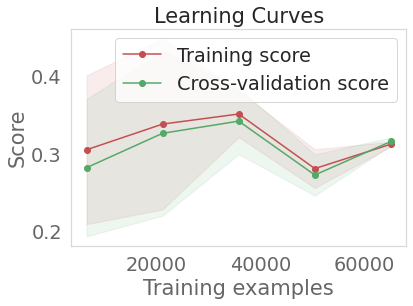

      Actual  Predicted        MAPE
0   0.027981   0.159040  468.383465
1   0.027981   0.187711  570.847257
2   0.029981   0.149366  398.200132
3   0.029981   0.126748  322.757092
4   0.029981   0.159040  430.465955
5   0.030981   0.135200  336.393079
6   0.033881   0.135200  299.039480
7   0.033981   0.159040  368.021464
8   0.034981   0.167711  379.427968
9   0.035981   0.187711  421.687222
10  0.035981   0.258240  617.702782
11  0.037982   0.167711  341.558460
12  0.039982   0.159040  297.783125
13  0.039982   0.135200  238.155517
14  0.039982   0.187711  369.492402
15  0.039982   0.126748  217.014948
16  0.039982   0.187711  369.492402
17  0.039982   0.187711  369.492402
18  0.039982   0.187711  369.492402
19  0.040982   0.187711  358.035779
20  0.040982   0.187711  358.035779
21  0.042982   0.187711  336.721876
22  0.043982   0.187711  326.791865
23  0.043982   0.167711  281.318561
24  0.043982   0.149366  239.609821
25  0.043982   0.149366  239.609821
26  0.045982   0.149366  224

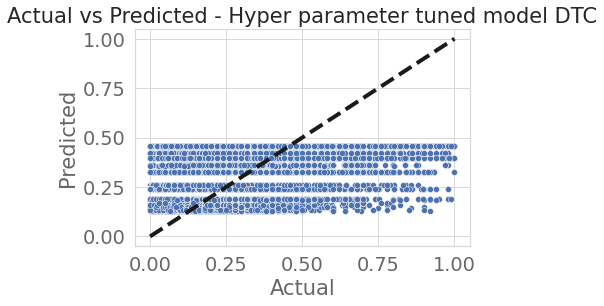

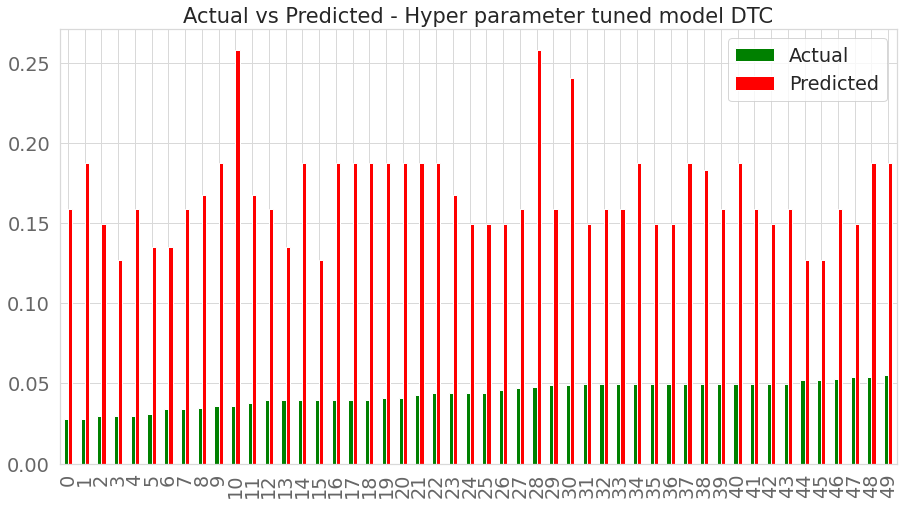

      Actual  Predicted        MAPE
0   0.027981   0.123941  342.946186
1   0.027981   0.123941  342.946186
2   0.029981   0.252990  743.829997
3   0.029981   0.324791  983.316512
4   0.029981   0.327547  992.506439
5   0.030981   0.252990  716.592102
6   0.033881   0.252990  646.694903
7   0.033981   0.123941  264.733204
8   0.034981   0.123941  254.306297
9   0.035981   0.123941  244.458985
10  0.035981   0.123941  244.458985
11  0.037982   0.123941  226.320018
12  0.039982   0.123941  209.995855
13  0.039982   0.182868  357.379180
14  0.039982   0.123941  209.995855
15  0.039982   0.123941  209.995855
16  0.039982   0.123941  209.995855
17  0.039982   0.123941  209.995855
18  0.039982   0.123941  209.995855
19  0.040982   0.123941  202.431291
20  0.040982   0.123941  202.431291
21  0.042982   0.123941  188.358173
22  0.043982   0.123941  181.801598
23  0.043982   0.123941  181.801598
24  0.043982   0.252990  475.216537
25  0.043982   0.252990  475.216537
26  0.045982   0.252990  450

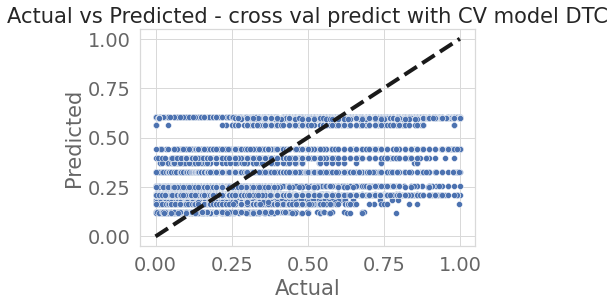

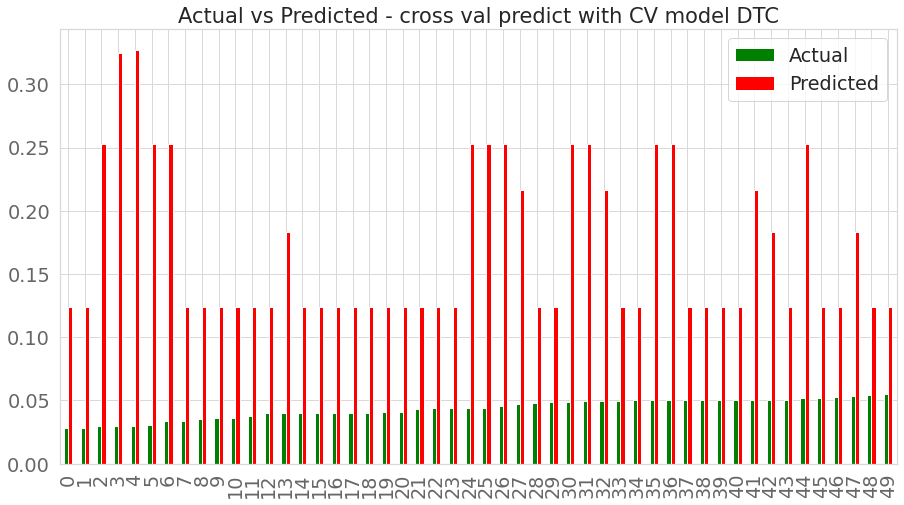

knn...
       Actual  Predicted        MAPE
0   0.027981   0.066969  139.337622
1   0.027981   0.054982   96.497498
2   0.029981   0.054649   82.277074
3   0.029981   0.043315   44.474094
4   0.029981   0.061582  105.403602
5   0.030981   0.061982  100.064558
6   0.033881   0.048649   43.585203
7   0.033981   0.074583  119.482048
8   0.034981   0.036615    4.669335
9   0.035981   0.043982   22.234575
10  0.035981   0.069983   94.496943
11  0.037982   0.066983   76.355977
12  0.039982   0.058609   46.589962
13  0.039982   0.086650  116.725029
14  0.039982   0.069949   74.954144
15  0.039982   0.068649   71.702518
16  0.039982   0.175987  340.170085
17  0.039982   0.079317   98.382525
18  0.039982   0.158246  295.797899
19  0.040982   0.075230   83.569221
20  0.040982   0.075230   83.569221
21  0.042982   0.097944  127.873430
22  0.043982   0.056949   29.483098
23  0.043982   0.069949   59.041989
24  0.043982   0.116318  164.468698
25  0.043982   0.072650   65.181143
26  0.045982   0.179

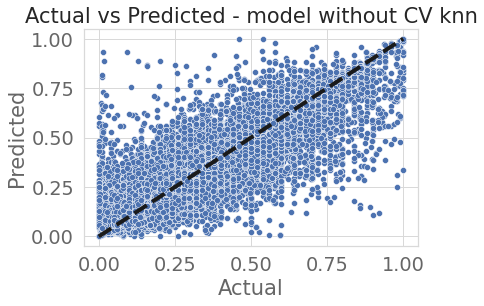

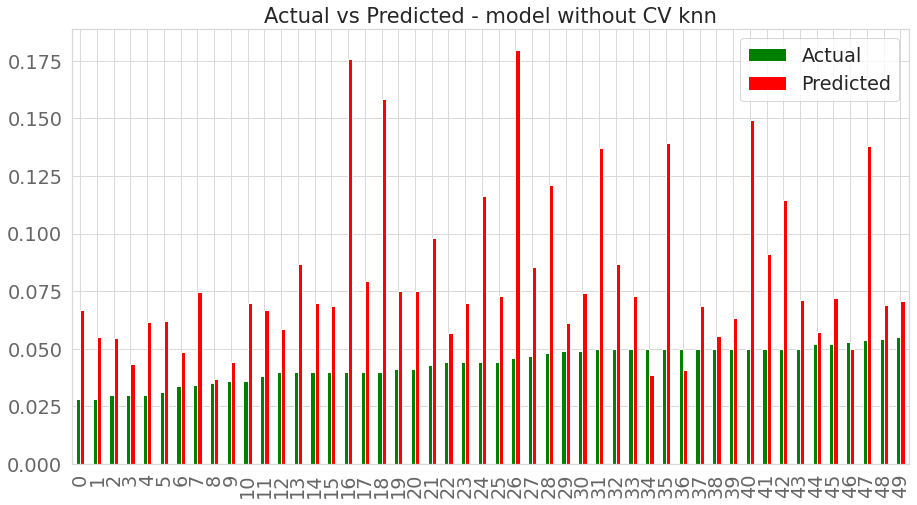

done
random forest...
       Actual  Predicted        MAPE
0   0.027981   0.081511  191.308890
1   0.027981   0.076862  174.691984
2   0.029981   0.076862  156.366969
3   0.029981   0.124604  315.607850
4   0.029981   0.104334  247.998662
5   0.030981   0.086259  178.423986
6   0.033881   0.076862  126.856013
7   0.033981   0.130851  285.067252
8   0.034981   0.076862  119.722176
9   0.035981   0.076862  113.615390
10  0.035981   0.086259  139.732493
11  0.037982   0.076862  102.366554
12  0.039982   0.086259  115.747251
13  0.039982   0.076862   92.243165
14  0.039982   0.124188  210.612618
15  0.039982   0.076862   92.243165
16  0.039982   0.156128  290.500431
17  0.039982   0.113731  184.459561
18  0.039982   0.161555  304.074604
19  0.040982   0.113731  177.518137
20  0.040982   0.113731  177.518137
21  0.042982   0.086259  100.688113
22  0.043982   0.076862   74.758566
23  0.043982   0.076862   74.758566
24  0.043982   0.124188  182.362266
25  0.043982   0.124188  182.362266
26  0

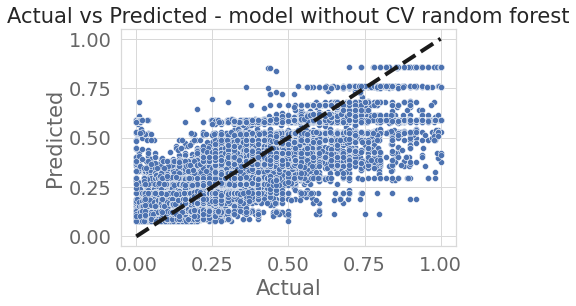

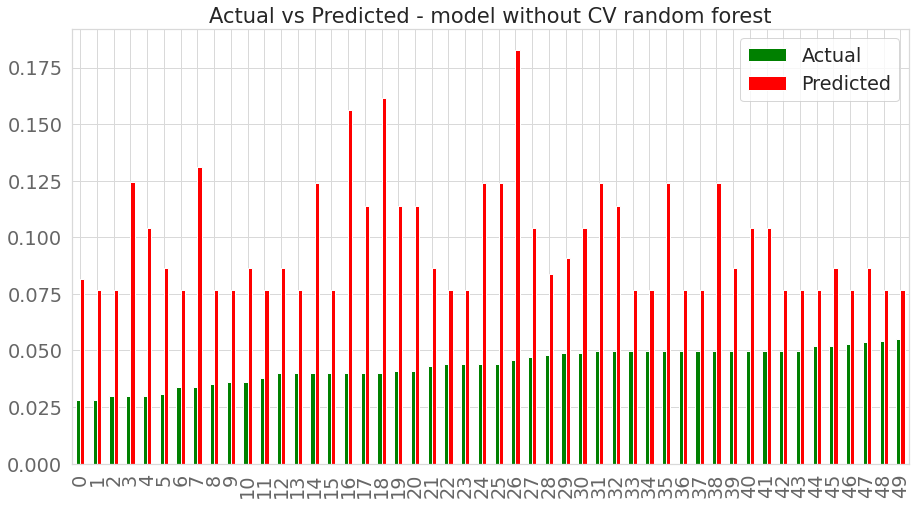

done
comparision of all models
            Model                 Techniques  ...       MSE       MAE
0           ridge     All Feature without CV  ...  0.011121  0.072393
1           ridge  Randomized Search with CV  ...  0.011121  0.072393
2           ridge          Cross val with CV  ...  0.011251  0.072424
3             sgd     All Feature without CV  ...  0.036118  0.149815
4             sgd  Randomized Search with CV  ...  0.011141  0.072524
5             sgd          Cross val with CV  ...  0.012123  0.076503
6          mlp-nn     All Feature without CV  ...  0.006708  0.054145
7          mlp-nn  Randomized Search with CV  ...  0.009653  0.064736
8          mlp-nn          Cross val with CV  ...  0.010590  0.067756
9             gbm     All Feature without CV  ...  0.006858  0.053502
10            gbm  Randomized Search with CV  ...  0.006668  0.051565
11            gbm          Cross val with CV  ...  0.007213  0.053691
12            gbm                RFE with CV  ...  0.006606

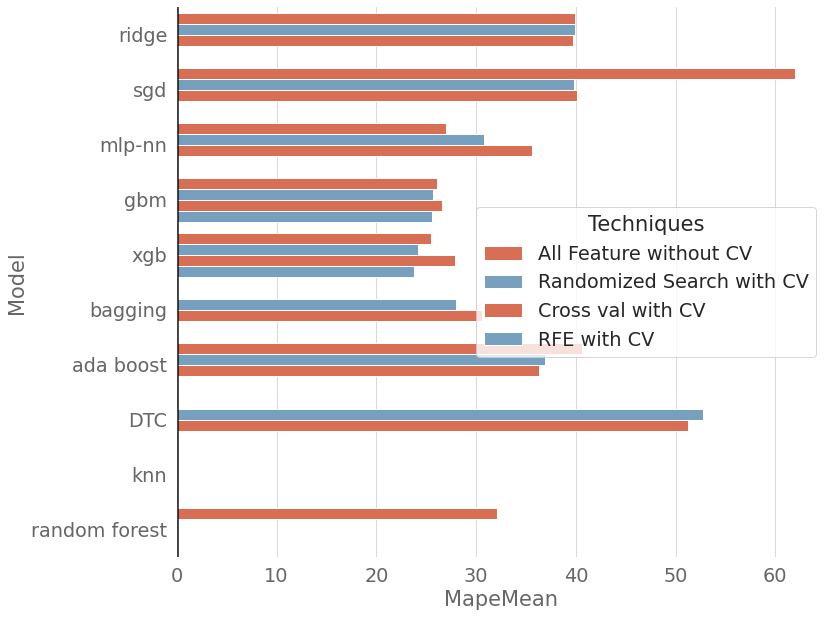

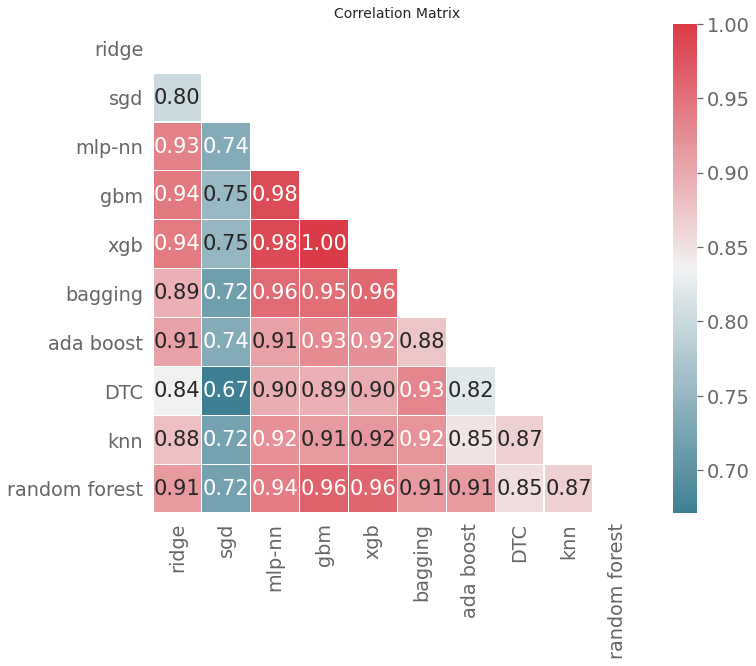

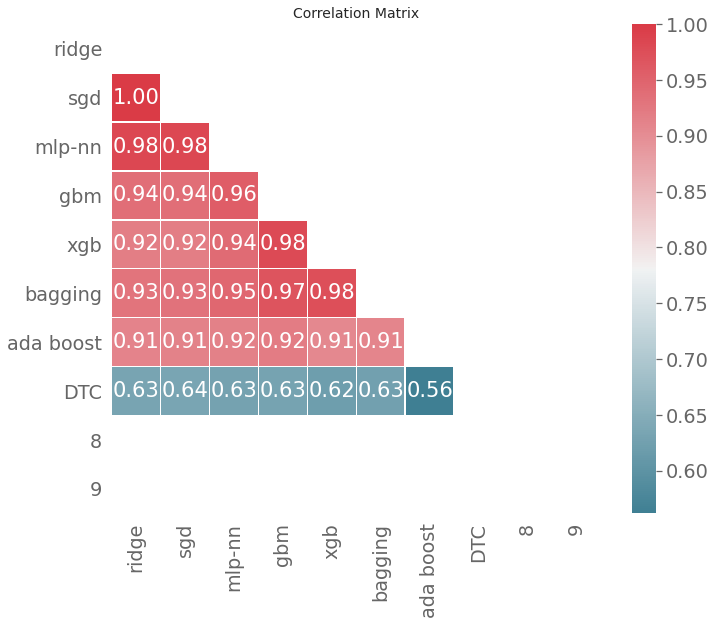

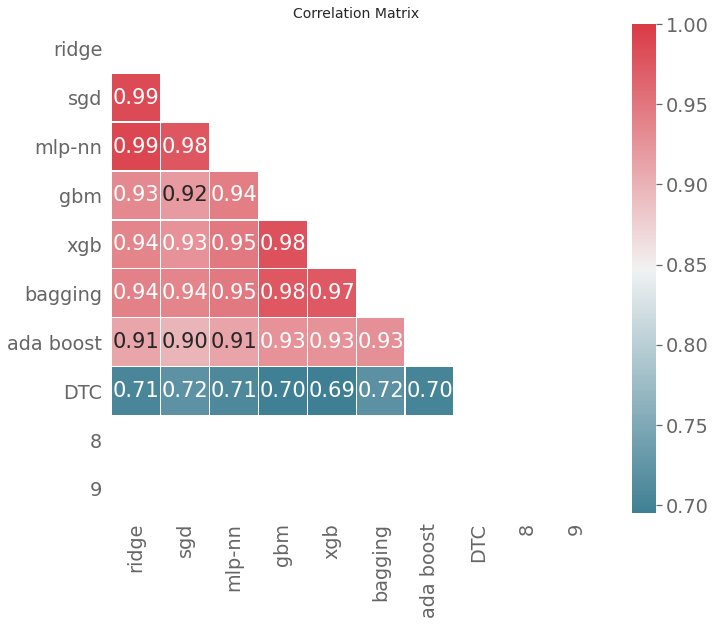

0
1
2
3
4
5
6
7
      Actual  Predicted        MAPE
0   0.027981   0.067193  140.136390
1   0.027981   0.081155  190.035007
2   0.029981   0.016468   45.071281
3   0.029981   0.133536  345.398707
4   0.029981   0.196129  554.171849
5   0.030981   0.087575  182.670588
6   0.033881   0.056162   65.761181
7   0.033981   0.131015  285.549098
8   0.034981   0.013599   61.123718
9   0.035981   0.050158   39.400563
10  0.035981   0.095054  164.174911
11  0.037982   0.066539   75.187393
12  0.039982   0.045851   14.681123
13  0.039982   0.045911   14.831440
14  0.039982   0.087774  119.535153
15  0.039982   0.065171   63.001670
16  0.039982   0.135191  238.132839
17  0.039982   0.133434  233.738315
18  0.039982   0.169844  324.804553
19  0.040982   0.092152  124.862243
20  0.040982   0.092152  124.862243
21  0.042982   0.103370  140.496648
22  0.043982   0.052451   19.256984
23  0.043982   0.040918    6.966147
24  0.043982   0.120749  174.544497
25  0.043982   0.086532   96.745637
26  0.045982

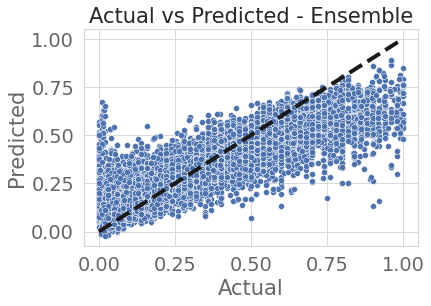

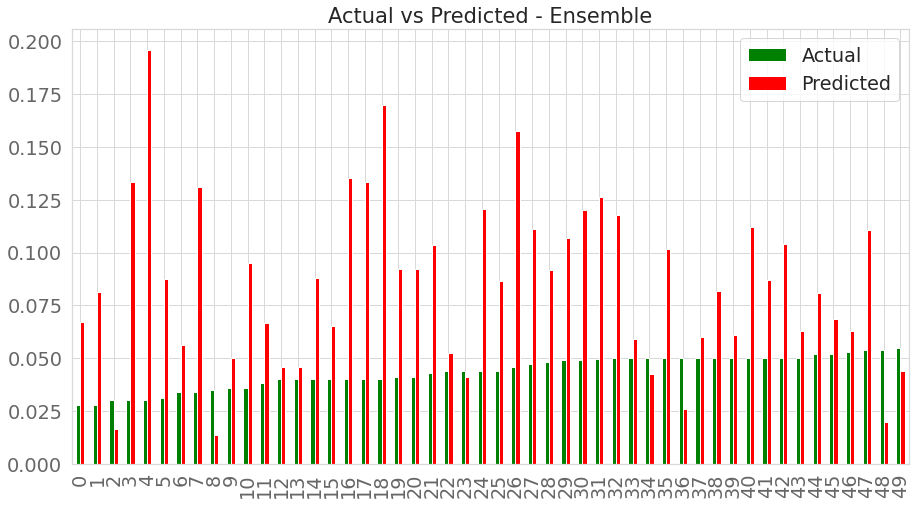

Done.



In [16]:
model.regressMultipleModels(predictorTrain, predictorTest, targetTrain, targetTest, 10)